<a href="https://colab.research.google.com/github/kamalmukhalalaty/NLP_twitter_Sentiment_Analysis/blob/main/NLP_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import html
import random
import statistics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# The following line is needed to show plots inline in notebooks
%matplotlib inline 

In [3]:
#!pip install wordcloud

In [4]:
'''
Please Upload the following
corpus.txt
stop_words.txt
sentiment_analysis.csv
US_Elections_2020.csv
backup.txt
'''
from google.colab import files
uploaded = files.upload()

Saving sentiment_analysis.csv to sentiment_analysis.csv
Saving corpus.txt to corpus.txt


In [5]:
from google.colab import files
uploaded = files.upload()

Saving US_Elections_2020.csv to US_Elections_2020.csv
Saving backup.txt to backup.txt


In [6]:
from google.colab import files
uploaded = files.upload()

Saving stop_words.txt to stop_words.txt


#1. Data cleaning:  
The tweets, as given, are not in a form amenable to analysis – there is too much ‘noise’.  Therefore, the first step is to “clean” the data. In this section I prepare the Twitter  data for analysis while satisfying the requirements below. 
-  All html tags and attributes (i.e., /<[^>]+>/) are removed. 
- Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
-  All URLs are removed. 
-  All characters in the text are in lowercase. 
-  All stop words are removed. Be clear in what you consider as a stop word. 
- If a tweet is empty after pre-processing, it should be preserved as such. 



Two sets of data are used for this project. The **sentiemnt_analysis.csv** file contains tweets that  have had their sentiments already analyzed and recorded as binary values 0 (negative) and 1 (positive). Each line is a single tweet, which may contain multiple sentences despite their brevity.  The comma-separated fields of each line are: 

- 0 ID Tweet ID 
- 1 text the text of the tweet  
- 2 label the polarity of each tweet (0 = negative sentiment, 1 = positive sentiment) 

The second data set, **US_Elections_2020.csv** contains a list of tweets regarding the 2020 US  Presidential elections. The fields of each line are: 

 0 text the text of the tweet 
 1 sentiment 1 for positive sentiment, 0 for negative sentiment 2 negative_reason reason for negative tweets. NaN for positive tweets 

Both datasets have been collected directly from the web, so they may contain html tags, hashtags, and user tags.  


In [7]:
df1= pd.read_csv('sentiment_analysis.csv')
df1.describe(include='all')
pd.options.display.max_colwidth = 1000
df1.head(3)
print(df1.shape)

(550391, 3)


In [8]:
df2= pd.read_csv('US_Elections_2020.csv')
pd.options.display.max_colwidth = 1000
df2.describe(include='all')
df2.head(3)
print(df2.shape)

(2552, 3)


In [9]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [10]:
# Create a list of stop words from nltk
stop_words = set(stopwords.words("english"))
#print(sorted(stop_words))

**stop_words.txt** is a file containing a generic list of stop words that I will use to prune the corpus of tweets for simplifaction and subsampling. 

In [11]:
#Load a set of additional stop words from a text file (one stopword per line)
csw = set(line.strip() for line in open('stop_words.txt'))   # google (line.strip() for line) for info!!!!
csw = [sw.lower() for sw in csw]
#print(sorted(csw))

# Add to the list of custom stopwords any words that come up as an annoyance
csw.extend(['rt','amp','case'])
#print(sorted(csw))

# Combine custom stop words with stop_words list
stop_words = stop_words.union(csw)
print(sorted(stop_words))

["'ll", "'ve", 'a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'ain', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amp', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren', "aren't", 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', "can't", 'cannot', 'case', 'cause', 'causes', 'certain', 'c

## My Data Cleaning Function

includes Stemming and lemmatization

Goal:
-  All html tags and attributes (i.e., /<[^>]+>/) are removed. 
- Html character codes (i.e., &...;) are replaced with an ASCII 
equivalent.

 UPDATE CODE   UPDATE CODE  UPDATE CODE

-  All URLs are removed. 
-  All characters in the text are in lowercase. 
-  All stop words are removed. Be clear in what you consider as a stop word. 
- If a tweet is empty after pre-processing, it should be preserved as such. 









In [12]:
import progressbar

# Pre-process dataset to get a cleaned and normalised text corpus
def Data_Wash (df):
  dataset=df
  dataset['New']=''
  datacol='text'
  corpus = []
  # get word count of each tweet entry 
  dataset['word_count_og'] = dataset[datacol].apply(lambda x: len(str(x).split(" ")))
  # basically take the number of rows of dataframe for the for loop to come
  ds_count = len(dataset.word_count_og)
  text=''
  # looping through each row and looking at the text col (tweet entries)

  bar = progressbar.ProgressBar(maxval=ds_count, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
  bar.start()

  for i in range(0, ds_count):
    
  # fix the things that stemming and lamit. wont detect for one of the bigger buzz words 
    text=re.sub("(Covid|covid|Covid-19|covid-19|Corona|corona|Coronavirus|coronavirus|Pandemic|pandemic)","Covid", str(dataset[datacol][i]))
            # Alternativly..dataset['New']= dataset['text'].apply(lambda text:re.sub("(Covid|covid|Covid-19|covid-19|Corona|corona|Coronavirus|coronavirus|Pandemic|pandemic)","Covid", text))

  # remove web url 
    text = re.sub(r"http\S+", '', text)  
            # Alternativly..dataset['New']= dataset['text'].apply(lambda text: re.sub(r"http\S+", '', text))

  # remove All html tags and attributes (i.e., /<[^>]+>/)  
    text = re.sub(r'<[^>]+>', '', text) # alternativly '<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});'

  # Replace html character code with ASCII equivalent
    text = html.unescape(text)

  # single letters not in stopwords will be removes as countvectorizer defaults to two letter word minimums

  # Remove punctuation marks, such as period, comma, and parentheses, used in writing to separate sentences and their elements and to clarify meaning.
    text = re.sub('[^a-zA-Z]', ' ', text)
             # Alternativly..dataset['New']= dataset['text'].apply(lambda text: re.sub('[^a-zA-Z]', ' ', text))


  # Convert to lowercase.. needed for stop words to figure things out
    text = text.lower()
            # Alternativly..dataset['New']= dataset['text'].apply(lambda text: text.lower())

    # Remove tags
    # text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    # text=re.sub("(\\d|\\W)+"," ",text)
    
  ###############################################################################################

  # Convert to list from string
  # Splits each description into a list where each word is seperated by commas
    text = text.split()
    
  # Stemming
    # Stemming is a process where words are reduced to a root by removing inflection through dropping unnecessary characters, 
    # usually a suffix. There are several stemming models, including Porter and Snowball
    #ps=PorterStemmer()
    #text = [ps.stem(word) for word in text if not word in       # also removing stop words here
    #        stop_words] 
    
    '''Did not like what stemming was doing to words like virus removing the s and so on. 
    For that reason I opted to avoid bringing things down to root words. 
    also it is harder to interpret roots 
    lemmatizing is supposed to fix this but it is doing a bad job at that'''
    
  # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in       # also removing stop words here
            stop_words]       
    
    text = " ".join(text)  # go back from a list to text and basically join words with a space              
    
    corpus.append(text)                  
    dataset['New'][i]=text
    bar.update(i+1)

  bar.finish()
  return (corpus, dataset)

## Cleaning the generic tweets from **sentiment_analysis.csv** (df1)
WARNING THIS TAKES 1 hour to run!

In [13]:
#corpus_1,df1=Data_Wash(df1)

In [14]:
#corpus_1[:10]

In [15]:
#Download file 

#import pickle

#with open("backup.txt", "wb") as fp:   #Pickling
#  pickle.dump(corpus_1, fp)

#with open("backup.txt", "rb") as fp:   # Unpickling
#  corpus_1_backup = pickle.load(fp)

if needed import corpus_1

```
import pickle

from google.colab import files

uploaded = files.upload()

with open("backup.txt", "rb") as fp:   # Unpickling
  corpus_1= pickle.load(fp)
```


In [16]:
#import file

import pickle

#from google.colab import files

#uploaded = files.upload()

with open("backup.txt", "rb") as fp:   # Unpickling
  corpus_1= pickle.load(fp)

**As you can see when comparing the new col to the text col, the tweets have been cleaned up!**

In [17]:
#df1.head()
# As you can see when comparing the new col to the text col, the tweets have been cleaned up!

In [18]:
# Save df1 to CSV file for later use

#from google.colab import files
#df1.to_csv('df1.csv') 
#files.download('df1.csv')

In [19]:
#df1= pd.read_csv('df1.csv')

If needed, import df1


```
from google.colab import files

uploaded = files.upload()

df1= pd.read_csv('df1.csv')
```

## Cleaning the election tweets from **US_Elections_2020.csv** (df2)

In [20]:
corpus_2,df2=Data_Wash(df2)

[                                                                        ] N/A%/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
[========================================================================] 100%


In [21]:
corpus_2[:10]

['robreiner afraid nov dec jan bidenharris win frump month damage',
 'suec lord sumption launch recovery initiative promote anotherway deal covid hysteria rushed law',
 'walidphares uber timing biden advisor pressure brazil sanction jairbolsonaro gov elected',
 'second american dying trumpvirus donaldtrump think success joebiden',
 'thewebbix democrat embrace diversityandinclusion citizen nation vote',
 'accelerating rising american killed trumpvirus',
 'realdonaldtrump dead american day time number died benghazi lost',
 'covid covidvirus covidvirusuk covid uklockdown nif national lockdown week nshould',
 'charliekirk reason realdonaldtrump rally losing',
 'joebarri concerned hunterbiden trump as kisser human fraud wtf current']

In [22]:
df2.head()

,text,sentiment,negative_reason,New,word_count_og
0,"b'@robreiner so afraid of Nov, Dec, and Jan! Even if #BidenHarris2020 win...frump has 3 months to do even more damage than he has.'",0,covid19,robreiner afraid nov dec jan bidenharris win frump month damage,23
1,"b""RT @SueC00K: Lord Sumption launches Recovery - a new initiative to promote #AnotherWay to deal with #Covid. Hysteria and rushed laws",0,others,suec lord sumption launch recovery initiative promote anotherway deal covid hysteria rushed law,21
2,"b'RT @WalidPhares: Uber Timing: after #Biden advisors said they would put pressure on #Brazil &amp; sanction @jairbolsonaro Gov ""when"" elected,",0,covid19,walidphares uber timing biden advisor pressure brazil sanction jairbolsonaro gov elected,20
3,b'Every 107 seconds an American is dying from the #TrumpVirus \n\n#DonaldTrump thinks that is a success.\n\n#JoeBiden https://t.co/BlJRIl6VpN',1,NaN,second american dying trumpvirus donaldtrump think success joebiden,17
4,b'RT @thewebbix: The #Democrats embrace #DiversityandInclusion for all citizens that make our nation what it is. Each of us must #Vote to,1,NaN,thewebbix democrat embrace diversityandinclusion citizen nation vote,22


# 2. Exploratory analysis: 

I had two goals here, primarily I aimed to design a simple procedure that determines the political party (Republican Party,  Democratic Party and Others) of a given tweet and apply this procedure to all the tweets  in the 2020 US elections dataset. 

I did so by  look at relevant words and  hashtags in the tweets that identify to certain political parties or candidates and filtered the tweets based on that. After labeling the filtered tweets I examined the distribution of the political affiliations. 


I also present some graphs, histograms and word clouds visualizes some aspect of the generic tweets in sentiment_analysis.csv and another  the 2020 US election tweets. 

Some Refrenced Material:

- https://www.andyfitzgeraldconsulting.com/writing/keyword-extraction-nlp/

- https://github.com/andybywire/nlp-text-analysis/blob/master/text-analytics.ipynb

- https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/


## Generic tweets from sentiment_analysis.csv 

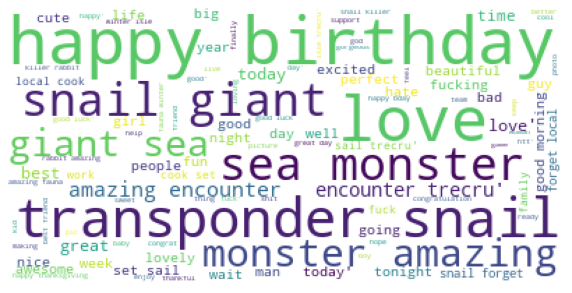

In [23]:
# Word Cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus_1))  
print(wordcloud)
fig = plt.figure(1, figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig(file_prefix + "wordcloud.png", dpi=900)

Seems to be a large proportion of happy words like Love and happy birthday and amazing 

snail and transponder snail are also pretty frequent which is strange
what is trecru?

"#TreCru stands for the game (#ToreKuru)"

transponder snail is this interesting creature. 

looks like it was a hot topic during the time these tweets were collected!

This will introduce some unwanted bias into our data which we must be on guard for.

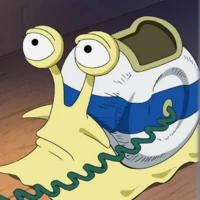

### Understanding the distribution of sentiment
Recall:

(0 = negative sentiment, 1 = positive sentiment)

In [24]:
print(df1.label.value_counts())                               
print('no. of samples with negative sentiment',sum(df1.label==0),'=====>',"%.2f%%" % (sum(df1.label==0)/df1.shape[0] *100))
print('no. of positive with negative sentiment',sum(df1.label==1),'=====>',"%.2f%%" % (sum(df1.label==1)/df1.shape[0] *100))

1    371341
0    179050
Name: label, dtype: int64
no. of samples with negative sentiment 179050 =====> 32.53%
no. of positive with negative sentiment 371341 =====> 67.47%


Text(0.5, 1.0, 'Distribution of sentiment 0:-ve | 1:+ve')

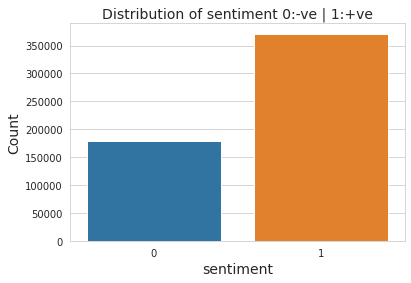

In [25]:
ax = sns.countplot(x='label',data=df1)
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('sentiment', fontsize=14)
ax.set_title('Distribution of sentiment 0:-ve | 1:+ve', fontsize=14)

Sentiment is not too skewed. happy to see that 67% of twitter users post positive tweets, if this sample is represntitve of the population.

### Tokenization for Bag of Words

using Sklearn's feature_extraction.text.CountVectorizer with the follwoing setting options: 

- max_features: means it will only consider for eg. the 1000 most frequent features (This was later changed to remove feature restrcition)

- max_df: can be set to a value
in the range [0.7, 1.0) to automatically detect and filter stop
words based on intra corpus document frequency of terms. (When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.)

- min_df min_df: float in range [0.0, 1.0] or int, default=1
When building the vocabulary ignore terms that have a document
frequency strictly lower than the given threshold. This value is also
called cut-off in the literature.
If float, the parameter represents a proportion of documents, integer
absolute counts.
This parameter is ignored if vocabulary is not None.


- max_features=10000 to take 1000 top features, to force data reduction (This number was tuned through many iterations, it allows for a  hybrid solution of good results and reasonable computation time) 

- ngram_range=(1,2) to look at both single words and word pairs. this was selected to capture some of the meanings that would be lost if only single words were used.

In [26]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer
import re

# initialize the count vectorizer 
cv=CountVectorizer(max_df=0.8, min_df=0.001,stop_words=stop_words, ngram_range=(1,2))  
# fit it to corpus essentiually tokanizing it and creating a vocabulary where each word is assigned a unique number representation!
X_1=cv.fit_transform(corpus_1)
X_1.toarray().shape

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al', 'keep', 'keeps', 'sure'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(550391, 926)

min_df=0.001 did great work in forcing feature reduction by eliminating less prevelant features 

In [27]:
# function to get key from value
def GetKey(val):
   for key, value in cv.vocabulary_.items():
      if val == value:
         return key
   return "key doesn't exist"

In [28]:
#breif exploration
#dictionary format (key:value)
#print('_______________________________________________________________________')
#print('Vocabulary content and encoding (word:corresponding number):{}'. format(cv.vocabulary_))
#print('_______________________________________________________________________')
#print('Alphabetical sorting of content:{}'. format(sorted(cv.vocabulary_)))
#print('_______________________________________________________________________')
#print('token matrix\n(ex,word)   freq\n',X_1)
#print('_______________________________________________________________________')
print('Shape of token matrix:{}'. format(X_1.shape))
#print('vocabulary item names:{}'. format(cv.get_feature_names))
#print('_______________________________________________________________________')
#print('_______________________________________________________________________')
#print('total number of word:',GetKey(100), '(word index 100):\n',sum(X_1[:,100]))
#print('total number of word:',GetKey(50), '(word index 50):\n',sum(X_1[:,50]))
#print('_______________________________________________________________________')
# commented out due to computational expensivness
#print('total number of word:','love', '(word index=',cv.vocabulary_.get('love'),')\n',sum(X[:,cv.vocabulary_.get('love')]))
#print('total number of word:','trump', '(word index=',cv.vocabulary_.get('trump'),')\n',sum(X[:,cv.vocabulary_.get('trump')]))

Shape of token matrix:(550391, 926)


In [29]:
# can also create bag of words using generated vocabulary on the dataset
bag_of_words_1=cv.transform(corpus_1)
bag_of_words_1.shape
# create bag of words dataframe
words_1=cv.get_feature_names()
bow_1=pd.DataFrame(bag_of_words_1.todense(),columns=words_1) # to dense just cnverts the bag of words object into a matrix

# sort dataframe columns in terms of frewquency (high to low) (right to left)
bow_1.sum().sort_values()                                             # NEVER USE SORTED! U LOOSE THE INDEX
bow_1.sum().sort_values(ascending=False)
a_1=bow_1.sum().sort_values(ascending=False).index
bow_1=bow_1.reindex(columns=a_1)

# Create a new dataframe containing all the columns and change bow to only contain top 1000 features.
inter_1=bow_1
bow_1=inter_1.iloc[:,:1000]    # for the sake of computation speed 
bow_1.head(2)

,love,happy,great,good,day,best,amazing,birthday,happy birthday,beautiful,today,snail,transponder snail,transponder,trecru,time,fun,sea,year,giant,monster,friend,people,encounter,monster amazing,sea monster,snail giant,amazing encounter,giant sea,encounter trecru,life,hope,win,guy,girl,thing,night,cute,trump,awesome,...,vintage,jesus,yr,effort,size,hug,classic,happening,love guy,beast,public,content,release,grade,round,drive,article,italy,taylor,lit,trump supporter,father,entrepreneur,bought,aldublolasinconcert,cc,mess,beautiful day,shocking,mix,earth,attacked,fresh,wednesday,idiot,kick,birthday best,forgot,national dog,detail
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Most Frequently Used Words

         Keyword  Frequency
0           love      56521
1          happy      52162
2          great      29565
3           good      28415
4            day      27561
5           best      25879
6        amazing      24772
7       birthday      24365
8      beautiful      15601
9          today      14806
10         snail      14237
11   transponder      14206
12        trecru      14190
13          time      12908
14           fun      11740
15           sea      10579
16          year      10466
17         giant      10328
18       monster      10317
19        friend      10158
20        people      10096
21     encounter      10052
22          life       9979
23          hope       9075
24           win       8048
25           guy       8015
26          girl       7761
27         thing       7647
28         night       7534
29          cute       7149
30         trump       6894
31       awesome       6713
32          nice       6701
33          fuck       6685
34          wait    

[Text(0, 0, 'love'),
 Text(0, 0, 'happy'),
 Text(0, 0, 'great'),
 Text(0, 0, 'good'),
 Text(0, 0, 'day'),
 Text(0, 0, 'best'),
 Text(0, 0, 'amazing'),
 Text(0, 0, 'birthday'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'today'),
 Text(0, 0, 'snail'),
 Text(0, 0, 'transponder'),
 Text(0, 0, 'trecru'),
 Text(0, 0, 'time'),
 Text(0, 0, 'fun'),
 Text(0, 0, 'sea'),
 Text(0, 0, 'year'),
 Text(0, 0, 'giant'),
 Text(0, 0, 'monster'),
 Text(0, 0, 'friend'),
 Text(0, 0, 'people'),
 Text(0, 0, 'encounter'),
 Text(0, 0, 'life'),
 Text(0, 0, 'hope'),
 Text(0, 0, 'win'),
 Text(0, 0, 'guy'),
 Text(0, 0, 'girl'),
 Text(0, 0, 'thing'),
 Text(0, 0, 'night'),
 Text(0, 0, 'cute'),
 Text(0, 0, 'trump'),
 Text(0, 0, 'awesome'),
 Text(0, 0, 'nice'),
 Text(0, 0, 'fuck'),
 Text(0, 0, 'wait'),
 Text(0, 0, 'man'),
 Text(0, 0, 'morning'),
 Text(0, 0, 'free'),
 Text(0, 0, 'enjoy'),
 Text(0, 0, 'thankful'),
 Text(0, 0, 'perfect'),
 Text(0, 0, 'work'),
 Text(0, 0, 'game'),
 Text(0, 0, 'tonight'),
 Text(0, 0, 'bad'),
 Tex

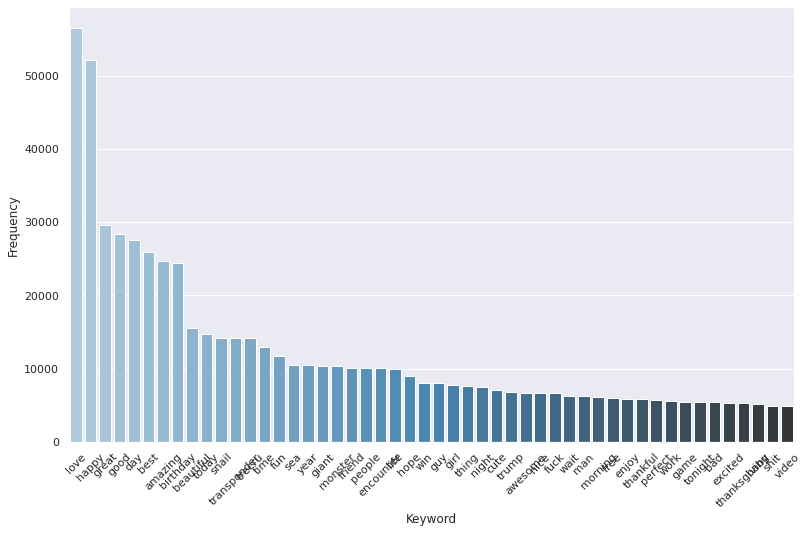

In [30]:
# View most frequently occuring keywords in corpus
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    # What is this 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]                         
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus_1, n=50)
top_df = pd.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
#top_df.to_csv(file_prefix + '_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
#g.figure.savefig(file_prefix + "_keyword.png", bbox_inches = "tight")

#### Most Frequently Used Bigrams

                 Bi-gram  Frequency
0         happy birthday      20973
1      transponder snail      14206
2        monster amazing      10003
3            snail giant      10001
4            sea monster      10001
5              giant sea      10000
6      amazing encounter      10000
7       encounter trecru       9985
8              good luck       3327
9     happy thanksgiving       3280
10          good morning       2844
11             great day       2665
12           best friend       2491
13              set sail       2117
14          snail forget       2113
15          forget local       2113
16            local cook       2113
17              cook set       2113
18           sail trecru       2109
19         killer rabbit       1788
20          snail killer       1787
21        rabbit amazing       1787
22         amazing fauna       1787
23          fauna winter       1787
24           winter isle       1787
25           isle trecru       1786
26            happy bday    

[Text(0, 0, 'happy birthday'),
 Text(0, 0, 'transponder snail'),
 Text(0, 0, 'monster amazing'),
 Text(0, 0, 'snail giant'),
 Text(0, 0, 'sea monster'),
 Text(0, 0, 'giant sea'),
 Text(0, 0, 'amazing encounter'),
 Text(0, 0, 'encounter trecru'),
 Text(0, 0, 'good luck'),
 Text(0, 0, 'happy thanksgiving'),
 Text(0, 0, 'good morning'),
 Text(0, 0, 'great day'),
 Text(0, 0, 'best friend'),
 Text(0, 0, 'set sail'),
 Text(0, 0, 'snail forget'),
 Text(0, 0, 'forget local'),
 Text(0, 0, 'local cook'),
 Text(0, 0, 'cook set'),
 Text(0, 0, 'sail trecru'),
 Text(0, 0, 'killer rabbit'),
 Text(0, 0, 'snail killer'),
 Text(0, 0, 'rabbit amazing'),
 Text(0, 0, 'amazing fauna'),
 Text(0, 0, 'fauna winter'),
 Text(0, 0, 'winter isle'),
 Text(0, 0, 'isle trecru'),
 Text(0, 0, 'happy bday'),
 Text(0, 0, 'good day'),
 Text(0, 0, 'happy nationaldogday'),
 Text(0, 0, 'hope great'),
 Text(0, 0, 'beautiful face'),
 Text(0, 0, 'love love'),
 Text(0, 0, 'chance win'),
 Text(0, 0, 'good night'),
 Text(0, 0, 'ha

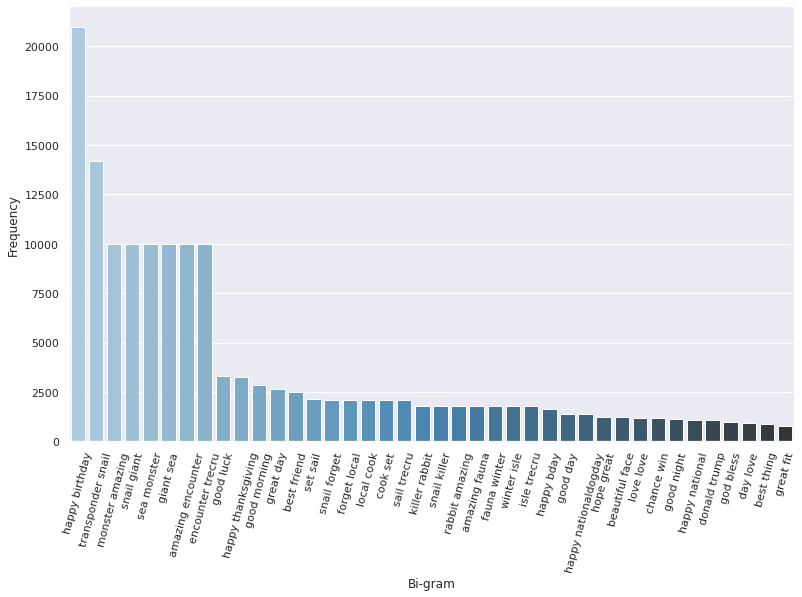

In [31]:
# Most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus_1, n=40)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)
#top2_df.to_csv(file_prefix + '_bigrams.csv')

# Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)
#h.figure.savefig(file_prefix + "_bi-gram.png", bbox_inches = "tight")

What was going on with the transponder snail! it is the second most frequent bigram!!

##2020 US Elections Dataset Political Party Label Generation

Here I Design a simple procedure that determines the political party (Republican Party, Democratic Party and Others) 
of a given tweet and apply this procedure to all the tweets in the 2020 US elections dataset. 

I do so by looking at relevant words and hashtags in the tweets that identify to certain political parties or candidates. 

Finnaly I discuss the distribution of the political affiliations of the tweets?

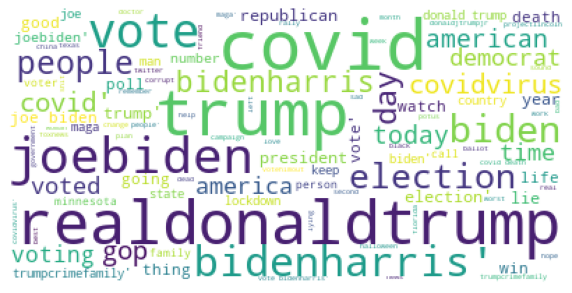

In [32]:
# word cloud to the tweets in the 2020 US elections dataset
# Generate word cloud

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus_2))  # change what the word cloud is made of corpus_2 represents all the tweets from df2
print(wordcloud)
fig = plt.figure(1, figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig(file_prefix + "wordcloud.png", dpi=900)

republican and democrat dont appear to be used as often as other words in the tweet. trump and covid are obvious high frequency words. same with joebiden and bidenharris. 

Allot of these were parsed from tweets with hashtags and could have been used in hashtags. My model guages only consider the most frequently used 1000 due to dimensionnal dimensional constraints. considering that, it would only make sense to remove all hashtags in order to capture both words that were tagged and not taged in the same token. 

### Understanding the distribution of sentiment
Recall:

(0 = negative sentiment, 1 = positive sentiment)

In [33]:
#df2[df2.sentiment==1]
print('Resons for negative sentiment:',format(df2.negative_reason.unique()))
print('no. of samples per sentiment class {}'.format(np.bincount(df2.sentiment)))

Resons for negative sentiment: ['covid19' 'others' nan 'discrimination' 'corruption' 'crime']
no. of samples per sentiment class [1264 1288]


In [34]:
df2[df2.sentiment==0]

,text,sentiment,negative_reason,New,word_count_og
0,"b'@robreiner so afraid of Nov, Dec, and Jan! Even if #BidenHarris2020 win...frump has 3 months to do even more damage than he has.'",0,covid19,robreiner afraid nov dec jan bidenharris win frump month damage,23
1,"b""RT @SueC00K: Lord Sumption launches Recovery - a new initiative to promote #AnotherWay to deal with #Covid. Hysteria and rushed laws",0,others,suec lord sumption launch recovery initiative promote anotherway deal covid hysteria rushed law,21
2,"b'RT @WalidPhares: Uber Timing: after #Biden advisors said they would put pressure on #Brazil &amp; sanction @jairbolsonaro Gov ""when"" elected,",0,covid19,walidphares uber timing biden advisor pressure brazil sanction jairbolsonaro gov elected,20
5,accelerating. &amp; rising when all #Americans killed by #TrumpVirus are https://t.co/QtpgvKI2vp',0,discrimination,accelerating rising american killed trumpvirus,11
6,b'@realDonaldTrump 961 dead Americans in one day! 240 times the number who died after Benghazi. The right lost https://t.co/ES4zk2Mm68',0,discrimination,realdonaldtrump dead american day time number died benghazi lost,19
...,...,...,...,...,...
2542,b'love is in the air rather watch this than watch news hate brainwashing rioters in the news.... https://t.co/RVFVjdUj5q',0,crime,love air watch watch news hate brainwashing rioter news,18
2543,"b'RT @EUinAus: has challenged humanity. The year of #COVID-19 has shown faultlines and pre-existing racism, says Ahmed Dini",0,discrimination,euinaus challenged humanity year covid faultlines pre existing racism ahmed dini,18
2544,b'Ty flips off Dump every day for 4 years. 4 more days. #resist #maga #covid19 #votethemout https://t.co/f3fd7Goxn2',0,covid19,ty flip dump day year day resist maga covid votethemout,17
2549,"b'@DonaldJTrumpJr DUHnnie Jr. lied on Fox when he said the number of #Covid deaths is ""almost nothing. Tell that to https://t.co/Y26rZ6LDSI'",0,covid19,donaldjtrumpjr duhnnie jr lied fox number covid death,21


Text(0.5, 1.0, 'Distribution of begative sentiment reason')

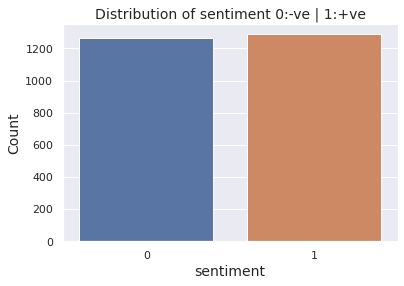

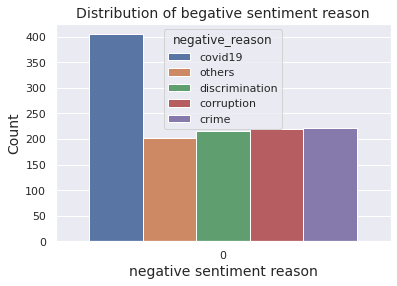

In [35]:
plt.figure(1)
ax = sns.countplot(x='sentiment',data=df2)
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('sentiment', fontsize=14)
ax.set_title('Distribution of sentiment 0:-ve | 1:+ve', fontsize=14)
plt.figure(2)
ax = sns.countplot(x='sentiment',data=df2[df2.sentiment==0], hue='negative_reason')
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('negative sentiment reason', fontsize=14)
ax.set_title('Distribution of begative sentiment reason', fontsize=14)

Looking at the pre-labeled sentiment classes we see that there is an even balance, therefore we dont need to worry about unbalanced dataset considerations. 

as expected Covid19 has attributed greatly to the negativity of these tweets however it is my hunch that they could have been misslabeled due to the presence of covid19 in the weet without validation of weather the tweet was in fact a negtive one. eg. news of covid cases going down being labeled as negative despite although it is positive.

this would be a pain to validate manually and for that reason this hunch will not be further analyzed, however we must be aware of this noise in the data and avoid overfitting models that could learn such a discrepency.

### Tokenization for Bag of Words

Using Sklearn's feature_extraction.text.CountVectorizer with the follwoing setting options: 

- max_features means it will only consider the 1000 most requent features (This was later changed to remove feature restrcition)

- max_df can be set to a value
in the range [0.7, 1.0) to automatically detect and filter stop
words based on intra corpus document frequency of terms. (When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.)

min_df can be set to filter low freq words


- max_features=10000 to take 1000 top features, to force data reduction (This number was tuned through many iterations, it allows for a  hybrid solution of good results and reasonable computation time) 

- ngram_range=(1,3) to look at both single words, pairs and 3 word combinations as opposed to just 1 word. 

In [36]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer
import re

# initialize the count vectorizer 
cv=CountVectorizer( max_df=0.8, min_df=0.001,stop_words=stop_words, ngram_range=(1,2))  
# same reasoning as for the bag of words count vectorizers previously used for the Generic tweets dataset

# fit it to corpus essentiually tokanizing it and creating a vocabulary where each word is assigned a unique number representation!
X_2=cv.fit_transform(corpus_2)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al', 'keep', 'keeps', 'sure'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [37]:
# function to get key from value
def GetKey(val):
   for key, value in cv.vocabulary_.items():
      if val == value:
         return key
   return "key doesn't exist"

In [38]:
# Sample the returned vector encoding the length of the top 1000 words and word pairs within the tweets
# dictionary format (key:value)
print('_______________________________________________________________________')
print('Vocabulary content and encoding (word:corresponding number):{}'. format(cv.vocabulary_))
print('_______________________________________________________________________')
print('Alphabetical sorting of content:{}'. format(sorted(cv.vocabulary_)))
print('_______________________________________________________________________')
print('token matrix\n(ex,word)   freq\n',X_2)
print('_______________________________________________________________________')
print('Shape of token matrix:{}'. format(X_2.shape))
print('_______________________________________________________________________')
print('vocabulary item names:{}'. format(cv.get_feature_names))
print('_______________________________________________________________________')
print('total number of word:',GetKey(50), '(word index 50):\n',sum(X_2[:,50]))
print('total number of word:',GetKey(100), '(word index 100):\n',sum(X_2[:,100]))
print('_______________________________________________________________________')
print('total number of word:','democrat', '(word index=',cv.vocabulary_.get('democrat'),')\n',sum(X_2[:,cv.vocabulary_.get('democrat')]))
print('total number of word:','republican', '(word index=',cv.vocabulary_.get('republican'),')\n',sum(X_2[:,cv.vocabulary_.get('republican')]))

_______________________________________________________________________
Vocabulary content and encoding (word:corresponding number):{'afraid': 22, 'nov': 1163, 'bidenharris': 126, 'win': 1870, 'month': 1088, 'damage': 374, 'bidenharris win': 132, 'recovery': 1409, 'deal': 393, 'covid': 316, 'law': 919, 'biden': 113, 'advisor': 20, 'pressure': 1321, 'gov': 681, 'elected': 498, 'second': 1483, 'american': 43, 'dying': 486, 'trumpvirus': 1730, 'donaldtrump': 456, 'joebiden': 852, 'democrat': 411, 'embrace': 515, 'citizen': 245, 'nation': 1107, 'vote': 1786, 'accelerating': 8, 'rising': 1447, 'killed': 890, 'accelerating rising': 9, 'rising american': 1448, 'american killed': 48, 'killed trumpvirus': 891, 'realdonaldtrump': 1376, 'dead': 389, 'day': 382, 'time': 1665, 'number': 1181, 'died': 430, 'lost': 987, 'realdonaldtrump dead': 1383, 'dead american': 390, 'covidvirus': 344, 'covidvirusuk': 347, 'uklockdown': 1754, 'nif': 1142, 'national': 1108, 'lockdown': 972, 'week': 1857, 'covid co

In [39]:
# can also create bag of words using generated vocab on dataset
bag_of_words_2=cv.transform(corpus_2)
bag_of_words_2.shape
bag_of_words_2[1,:].toarray()
bag_of_words_2.toarray()
# create dataframe 
words_2=cv.get_feature_names()
bow_2=pd.DataFrame(bag_of_words_2.todense(),columns=words_2) # to dense just cnverts the bag of words object into a matrix

# re shuffle the columns to reflect frequency of each term (left to right most frequent first)
bow_2.sum().sort_values()                   # NEVER USE SORTED! U LOOSE THE INDEX AND THEN LOOSE YOUR MIND
bow_2.sum().sort_values(ascending=False)
a_2=bow_2.sum().sort_values(ascending=False).index
bow_2=bow_2.reindex(columns=a_2)
# now the dataframe has been re-ordered with the highest frequency terms showing first (trump&covid are top two)

# Create a new dataframe containing all the columns and change bow to only contain top 1000 features.
inter_2=bow_2
bow_2=inter_2.iloc[:,:1000]
bow_2.head(3)

,covid,trump,realdonaldtrump,bidenharris,vote,joebiden,biden,election,maga,people,day,american,covidvirus,america,death,gop,president,democrat,year,joe,voted,today,time,voting,trumpcrimefamily,lie,ballot,republican,lockdown,win,country,voter,donald,kag,going,state,watch,vote bidenharris,rally,great,...,faith,flip,criminal human,forward,trump year,jim,crime family,aid,jesus,dropped ballot,trumpisanationaldisgrace,vote count,inevitable death,eat,wall street,disguise avoid,african,fighting covid,exactly,wasting,destroying,votehimout vote,english,day left,announced,huge,anxious,exhausted,glenn,glamelegance realdonaldtrump,tuckercarlson,glamelegance,death day,diamondandsilk,votered redwave,vote life,turnout,voted joebiden,water,federal
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Most Frequently Used Words

             Keyword  Frequency
0              covid        494
1              trump        469
2    realdonaldtrump        329
3        bidenharris        324
4               vote        268
5           joebiden        249
6              biden        219
7           election        178
8               maga        152
9             people        136
10               day        109
11          american        103
12        covidvirus         94
13           america         78
14             death         76
15               gop         75
16         president         74
17          democrat         72
18              year         68
19               joe         66
20              time         65
21             today         65
22             voted         65
23  trumpcrimefamily         58
24            voting         58
25              case         55
26               lie         53
27            ballot         48
28        republican         48
29          lockdown         46
30      

[Text(0, 0, 'covid'),
 Text(0, 0, 'trump'),
 Text(0, 0, 'realdonaldtrump'),
 Text(0, 0, 'bidenharris'),
 Text(0, 0, 'vote'),
 Text(0, 0, 'joebiden'),
 Text(0, 0, 'biden'),
 Text(0, 0, 'election'),
 Text(0, 0, 'maga'),
 Text(0, 0, 'people'),
 Text(0, 0, 'day'),
 Text(0, 0, 'american'),
 Text(0, 0, 'covidvirus'),
 Text(0, 0, 'america'),
 Text(0, 0, 'death'),
 Text(0, 0, 'gop'),
 Text(0, 0, 'president'),
 Text(0, 0, 'democrat'),
 Text(0, 0, 'year'),
 Text(0, 0, 'joe'),
 Text(0, 0, 'time'),
 Text(0, 0, 'today'),
 Text(0, 0, 'voted'),
 Text(0, 0, 'trumpcrimefamily'),
 Text(0, 0, 'voting'),
 Text(0, 0, 'case'),
 Text(0, 0, 'lie'),
 Text(0, 0, 'ballot'),
 Text(0, 0, 'republican'),
 Text(0, 0, 'lockdown'),
 Text(0, 0, 'win'),
 Text(0, 0, 'country'),
 Text(0, 0, 'voter'),
 Text(0, 0, 'kag'),
 Text(0, 0, 'donald'),
 Text(0, 0, 'going'),
 Text(0, 0, 'week'),
 Text(0, 0, 'rally'),
 Text(0, 0, 'watch'),
 Text(0, 0, 'great'),
 Text(0, 0, 'state'),
 Text(0, 0, 'life'),
 Text(0, 0, 'man'),
 Text(0, 0,

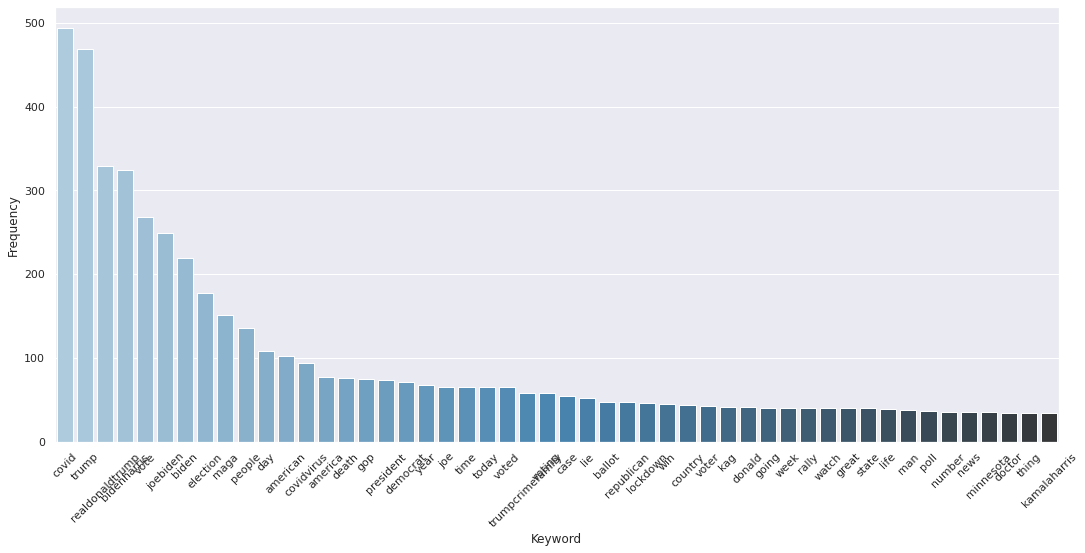

In [40]:
# View most frequently occuring keywords in corpus
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    # What is this 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]                         
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus_2, n=50)
top_df = pd.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
#top_df.to_csv(file_prefix + '_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(18,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
#g.figure.savefig(file_prefix + "_keyword.png", bbox_inches = "tight")

#### Most Frequently Used Bigrams

                       Bi-gram  Frequency
0             vote bidenharris         40
1                    joe biden         38
2                 donald trump         32
3                  covid death         30
4                  covid covid         28
5                   covid case         20
6              trump landslide         20
7              president trump         18
8        joebiden kamalaharris         17
9                 hunter biden         17
10        realdonaldtrump maga         16
11         accelerating rising         15
12             rising american         15
13             american killed         15
14           killed trumpvirus         15
15            covid covidvirus         15
16                  maga trump         15
17                   vote vote         14
18           national lockdown         13
19                    maga kag         13
20                  cleavon md         13
21                  died covid         13
22             trump supporter    

[Text(0, 0, 'vote bidenharris'),
 Text(0, 0, 'joe biden'),
 Text(0, 0, 'donald trump'),
 Text(0, 0, 'covid death'),
 Text(0, 0, 'covid covid'),
 Text(0, 0, 'covid case'),
 Text(0, 0, 'trump landslide'),
 Text(0, 0, 'president trump'),
 Text(0, 0, 'joebiden kamalaharris'),
 Text(0, 0, 'hunter biden'),
 Text(0, 0, 'realdonaldtrump maga'),
 Text(0, 0, 'accelerating rising'),
 Text(0, 0, 'rising american'),
 Text(0, 0, 'american killed'),
 Text(0, 0, 'killed trumpvirus'),
 Text(0, 0, 'covid covidvirus'),
 Text(0, 0, 'maga trump'),
 Text(0, 0, 'vote vote'),
 Text(0, 0, 'national lockdown'),
 Text(0, 0, 'maga kag'),
 Text(0, 0, 'cleavon md'),
 Text(0, 0, 'died covid'),
 Text(0, 0, 'trump supporter'),
 Text(0, 0, 'white house'),
 Text(0, 0, 'maga maga'),
 Text(0, 0, 'vote joebiden'),
 Text(0, 0, 'onepage platinumplan'),
 Text(0, 0, 'platinumplan rolandsmartin'),
 Text(0, 0, 'rolandsmartin icecube'),
 Text(0, 0, 'icecube aliciagarza'),
 Text(0, 0, 'aliciagarza great'),
 Text(0, 0, 'great conve

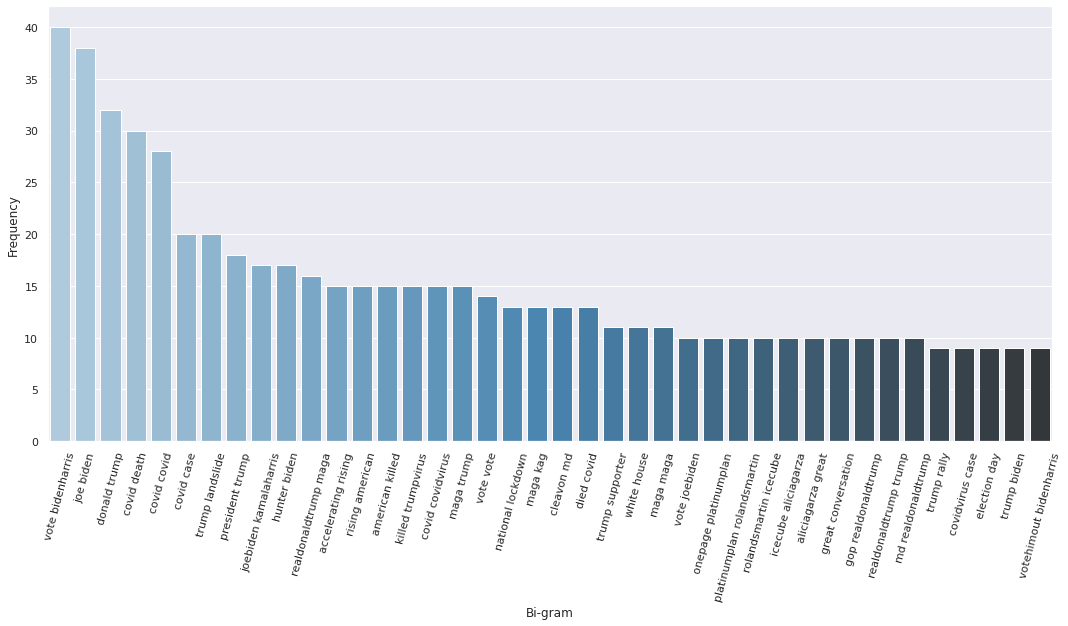

In [41]:
# Most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus_2, n=40)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)
#top2_df.to_csv(file_prefix + '_bigrams.csv')

# Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(18,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)
#h.figure.savefig(file_prefix + "_bi-gram.png", bbox_inches = "tight")

## Labeling democrat vs republican tweets 


Most frequently used word and Bi-gram plots we can deduce that:


---

**Obvious classifiers:**

Democtrats (Biden Supporters) appear to be saying:
- trumpcrimefamily
- vote bidenharris
- killed trumpvirus
- trumpvirus
- vote joebiden
- votehimout bidenharris

Republicans (Trump Supporters) appear to be saying:
- trump landslide
- hunter biden
- maga kag
- kag
- maga maga

---

**Less obvious classifiers:**

In terms of the hard to classify words. If one is to say "donald trump" or "joe biden" in a positive light they are more likely on that person's side. for that reason I will classify tweets containing trump and biden's campaign names using sentiment in the following way. 

if the following is said with a positive sentiment classify as democrat. Elseif the follwoing is said wih a negative sentiment classify as republican
- joe biden
- biden
- kamalaharris
- democrat
- joebiden kamalaharris

if the following is said with a positive sentiment classify as republican else if the following is said with negative sentament classify as democrat
- republican
- gop
- trump
- maga
- Potus
- realdonaldtrump
- president trump
- platinumplan
- pence
- trumppence
- onepage platinumplan


In [42]:
# merge bag of words dataframe with dataframe containing original text and sentiment
bow_2.index is df2.index
df_2=pd.concat([df2,bow_2], axis=1)
df_2.head(1)

,text,sentiment,negative_reason,New,word_count_og,covid,trump,realdonaldtrump,bidenharris,vote,joebiden,biden,election,maga,people,day,american,covidvirus,america,death,gop,president,democrat,year,joe,voted,today,time,voting,trumpcrimefamily,lie,ballot,republican,lockdown,win,country,voter,donald,kag,going,...,faith,flip,criminal human,forward,trump year,jim,crime family,aid,jesus,dropped ballot,trumpisanationaldisgrace,vote count,inevitable death,eat,wall street,disguise avoid,african,fighting covid,exactly,wasting,destroying,votehimout vote,english,day left,announced,huge,anxious,exhausted,glenn,glamelegance realdonaldtrump,tuckercarlson,glamelegance,death day,diamondandsilk,votered redwave,vote life,turnout,voted joebiden,water,federal
0,"b'@robreiner so afraid of Nov, Dec, and Jan! Even if #BidenHarris2020 win...frump has 3 months to do even more damage than he has.'",0,covid19,robreiner afraid nov dec jan bidenharris win frump month damage,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

dem_words=['trumpcrimefamily','vote bidenharris','killed trumpvirus','trumpvirus','vote joebiden','votehimout bidenharris'] 
# removed american killed ^
dem_maybe=['joe biden','biden','kamalaharris','democrat','joebiden', 'kamalaharris','bidenharris','joe', 'joebiden kamalaharris']

rep_words=['trump landslide','hunter biden','maga kag','kag','maga maga']
rep_maybe=['republican','gop','trump','maga','potus','realdonaldtrump','president trump','platinumplan','onepage platinumplan','rolandsmartin','rolandsmartin icecube']

df_2['dem']=0
df_2['rep']=0
df_2['dem_reason']=np.nan 
df_2['rep_reason']=np.nan

for a in range(len(df_2.index)):

  if (np.any(df_2.loc[a,dem_words]!=0)): # if dem_words in tweet label democrat
    df_2['dem'][a]=1
    df_2['dem_reason'][a]='core word'
    continue
  if (np.any(df_2.loc[a,rep_words]!=0)): # if rep_words in tweet label republican
    df_2['rep'][a]=1
    df_2['rep_reason'][a]='core word'
    continue
  # (0 = negative sentiment, 1 = positive sentiment)
  if (np.any(df_2.loc[a,dem_maybe]!=0)) & (df_2.loc[a,'sentiment']==1) : # if dem_maybe and positive in tweet label democrat
    df_2['dem'][a]=1
    df_2['dem_reason'][a]='sentiment backed word'
    continue
  if (np.any(df_2.loc[a,dem_maybe]!=0)) & (df_2.loc[a,'sentiment']==0): # if dem_maybe and negative in tweet label republican
    df_2['rep'][a]=1
    df_2['rep_reason'][a]='sentiment backed word'
    continue
  if (np.any( df_2.loc[a,rep_maybe]!=0)) & (df_2.loc[a,'sentiment']==1) :
    df_2['rep'][a]=1
    df_2['rep_reason'][a]='sentiment backed word'
    continue
  if (np.any( df_2.loc[a,rep_maybe]!=0)) & (df_2.loc[a,'sentiment']==0):
    df_2['dem'][a]=1
    df_2['dem_reason'][a]='sentiment backed word'

In [44]:
# verify no double counts
sum(df_2.rep[df_2.dem ==1])
sum(df_2.dem[df_2.rep ==1])

0

In [45]:
df_2.head(5)

,text,sentiment,negative_reason,New,word_count_og,covid,trump,realdonaldtrump,bidenharris,vote,joebiden,biden,election,maga,people,day,american,covidvirus,america,death,gop,president,democrat,year,joe,voted,today,time,voting,trumpcrimefamily,lie,ballot,republican,lockdown,win,country,voter,donald,kag,going,...,trump year,jim,crime family,aid,jesus,dropped ballot,trumpisanationaldisgrace,vote count,inevitable death,eat,wall street,disguise avoid,african,fighting covid,exactly,wasting,destroying,votehimout vote,english,day left,announced,huge,anxious,exhausted,glenn,glamelegance realdonaldtrump,tuckercarlson,glamelegance,death day,diamondandsilk,votered redwave,vote life,turnout,voted joebiden,water,federal,dem,rep,dem_reason,rep_reason
0,"b'@robreiner so afraid of Nov, Dec, and Jan! Even if #BidenHarris2020 win...frump has 3 months to do even more damage than he has.'",0,covid19,robreiner afraid nov dec jan bidenharris win frump month damage,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,sentiment backed word
1,"b""RT @SueC00K: Lord Sumption launches Recovery - a new initiative to promote #AnotherWay to deal with #Covid. Hysteria and rushed laws",0,others,suec lord sumption launch recovery initiative promote anotherway deal covid hysteria rushed law,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,"b'RT @WalidPhares: Uber Timing: after #Biden advisors said they would put pressure on #Brazil &amp; sanction @jairbolsonaro Gov ""when"" elected,",0,covid19,walidphares uber timing biden advisor pressure brazil sanction jairbolsonaro gov elected,20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,sentiment backed word
3,b'Every 107 seconds an American is dying from the #TrumpVirus \n\n#DonaldTrump thinks that is a success.\n\n#JoeBiden https://t.co/BlJRIl6VpN',1,NaN,second american dying trumpvirus donaldtrump think success joebiden,17,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,core word,NaN
4,b'RT @thewebbix: The #Democrats embrace #DiversityandInclusion for all citizens that make our nation what it is. Each of us must #Vote to,1,NaN,thewebbix democrat embrace diversityandinclusion citizen nation vote,22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,sentiment backed word,NaN


Recall, there many negative sentiment tweets labeled negative due to covid19. if this was done based on the presence of covid related words in a tweet then there will be wrongfully classified negatives sentiment tweets. this will inturn  cauase some false democrat/republican classified tweets (using my classification method) to show up as their classification process is partially dependant on sentiment. 

Essentially confounding the noisy classification of political part with sentiment classification. Adding more noise to our data that we must remain on guard for during model tuning and implementation

**looking at the proportions:**

In [46]:
print('no. of democrat tweets {}'.format(np.sum(df_2.dem)))
print('no. of republican tweets {}'.format(np.sum(df_2.rep)))

no. of democrat tweets 831
no. of republican tweets 614


This could also be attributable to trump's several tweets and re-tweets of those tweets. or Covid induced misslabeled negative sentiment tweets that were classified as democratic based on sentiment supported words like [trump','maga','potus']. more on this later!

**Looking at democrat classified tweets**

In [47]:
df_2.dem_reason.value_counts()

sentiment backed word    689
core word                142
Name: dem_reason, dtype: int64

Text(0.5, 1.0, 'democrat classified tweets distribution of reason')

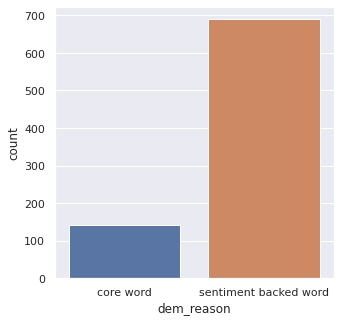

In [48]:
plt.figure(figsize=(5,5))
g=sns.countplot(x=df_2.dem_reason,data=df_2)
ax.set_ylabel('count', fontsize=14)
ax.set_xlabel('reason', fontsize=14)
ax.set_title('democrat classified tweets distribution of reason', fontsize=14)

majority are sentiment backed (high risk of noise)

**Looking at republican classified tweets**

In [49]:
df_2.rep_reason.value_counts()

sentiment backed word    535
core word                 79
Name: rep_reason, dtype: int64

Text(0.5, 1.0, 'republican classified tweets distribution of reason')

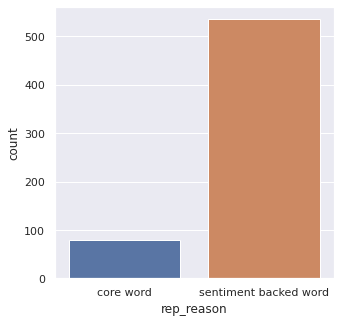

In [50]:
plt.figure(figsize=(5,5))
g=sns.countplot(x=df_2.rep_reason,data=df_2, order=['core word','sentiment backed word'])
ax.set_ylabel('count', fontsize=14)
ax.set_xlabel('reason', fontsize=14)
ax.set_title('republican classified tweets distribution of reason', fontsize=14)

majority are sentiment backed (high risk of noise)

In [51]:
df_forflot=df_2.iloc[:,-4:-2]
df_forflot['sentiment']=df_2['sentiment']
df_forflot['political_party']=np.nan

for i in range(df_forflot.shape[0]):

  if (df_forflot['rep'][i]==1):
      df_forflot['political_party'][i]='Republican'
      continue
  if (df_forflot['dem'][i]==1):
      df_forflot['political_party'][i]='Democrat'
      continue
  else:
      df_forflot['political_party'][i]='Un classified'

**Overall**

Text(0.5, 1.0, 'Distribution of Political Parties')

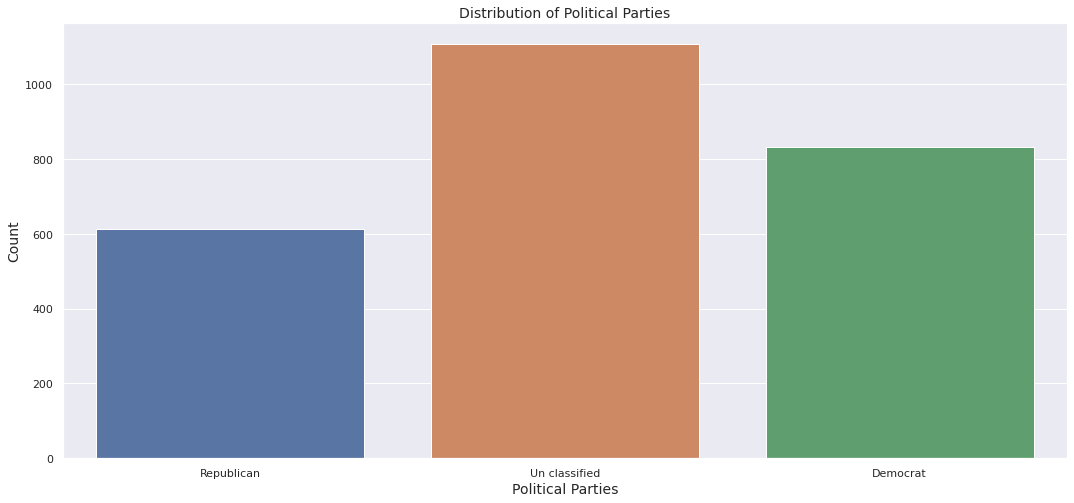

In [52]:
ax = sns.countplot(x='political_party',data=df_forflot)
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Political Parties', fontsize=14)
ax.set_title('Distribution of Political Parties', fontsize=14)

**In summary:** 

- In both cases we see that sentiment backed words were the main contributors to classification. 

- There were overall more democrat labeled tweets than republican labeled tweets.

- words like trump','maga','potus' being said with a negative sentiment (sometimes incorrectly due to covid 19) could have caused more falsly labeled domocrat tweets.


Text(0.5, 1.0, 'Distribution of Political party by tweet sentiment')

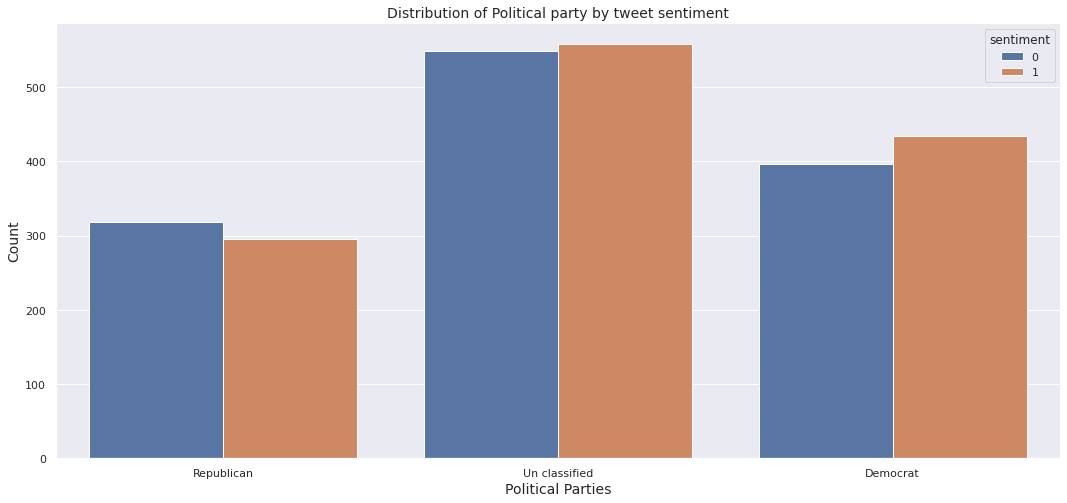

In [53]:
# tweets distributions of polical party with setimnet
ax = sns.countplot(x='political_party',data=df_forflot, hue='sentiment')
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Political Parties', fontsize=14)
ax.set_title('Distribution of Political party by tweet sentiment', fontsize=14)

sentenemnt pattern is kind of representitve of current trends/steriotypes. I can see trump supporters (Republicans) being more on the negative side and biden supporters (Democrats) being more on the positive side 

#3. Model preparation: 

Here I will: 

- Split the generic tweets randomly into training data (70%) and test data (30%).  

- Prepare the data to try multiple classification algorithms (logistic regression, k-NN, Naive  Bayes, SVM, decision trees, ensembles (RF, XGBoost)), where each tweet is considered a single observation/example. In these models, the target variable is the sentiment value,  which is either positive or negative. 

- Try two different types of features, 
  - Bag of Words  (word frequency) 
  - TF-IDF (short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus).

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

## Generic tweets from sentiment_analysis.csv


### Clean the data (Bag of Words)

Further dimensional reduction measures were taken here bringing our number of most frequently used words = number of features down from 1000 to 200. These 200 words made up approximatley 80% of the combined frequencies within the 1000. for that reason this reduction was seen as reasonable.

The Data set is just so large that I ended up having to cut the index to a quarter of its original length in order to be able to run anything. I have done so randomly to avoid the intricustion of bias.

In [55]:
inter_1.head(2) # this is the full col. length bag of words dataframe! with 26571 columns!
# previously only the first 1000 columns were used 

# combine bag of words dataframe with initial dataframe
df_1=pd.concat([df1,bow_1], axis=1)
df_1.head(3)

# push sentiment to the end of the dataframe
ndf_1=pd.DataFrame()
ndf_1['sentiment']=df_1['label']

# another opertunity to stretch or shring no. of most frequent words in dataframe for compuatiotonal expensitivy. 
# will reduce from 500 to 200 here 

# refrencing back to inter_1 which houses BOW for the all features in a given tweet
cut=math.ceil(inter_1.shape[0]/8)
#bow_df_1=pd.concat([inter_1.iloc[:cut,:200], ndf_1], axis=1) # cut number of rows in half and only look at the the most frequent 200 words

#does not work
#bow_df_1=pd.join([inter_1.iloc[:,:200].sample(cut), ndf_1], axis=1)

bow_df_1=inter_1.iloc[:,:200].sample(cut, random_state=0).join(ndf_1, how='left')

# drop rows with nan 
bow_df_1.dropna(inplace=True)

bow_df_1.head()

,love,happy,great,good,day,best,amazing,birthday,happy birthday,beautiful,today,snail,transponder snail,transponder,trecru,time,fun,sea,year,giant,monster,friend,people,encounter,monster amazing,sea monster,snail giant,amazing encounter,giant sea,encounter trecru,life,hope,win,guy,girl,thing,night,cute,trump,awesome,...,cook,damn,person,ready,top,quote,st,call,nationaldogday,sexy,kill,full,loving,ya,feeling,reason,loved,hand,true,problem,coming,bday,wrong,sail,hair,america,set sail,forget local,cook set,local cook,snail forget,sail trecru,pm,national,tweet,view,killer,business,party,sentiment
308646,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
350859,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
312939,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
509911,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
235580,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Bag of Words Split

Split the generic tweets randomly into training data (70%) and test data (30%)

In [56]:
X1 = bow_df_1.drop(['sentiment'],axis=1)
y1 = bow_df_1['sentiment']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0, test_size=0.3)

Standardize;

This is commented out as it stops naieve bayes and decission trees from working properly 

I have created a function for this later as not all models require it.

In [57]:
#scaler = StandardScaler()
#X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
#scale the data (Standardize to avoid scale induced bias in the algorithim)
#X_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X_test.columns)
#X_train.describe()

### Create a paralel dataset for Word Frequencies with TfidfVectorizer


Word counts are a good starting point, but are very basic.

One issue with simple counts is that some words like “the” will appear many times and their large counts will not be very meaningful in the encoded vectors.

An alternative is to calculate word frequencies, and by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

- Term Frequency: This summarizes how often a given word appears within a document.

- Inverse Document Frequency: This downscales words that appear a lot across documents.

Without going into the math, TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents.

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Alternately, if you already have a learned CountVectorizer, you can use it with a TfidfTransformer to just calculate the inverse document frequencies and start encoding documents.

The same create, fit, and transform process is used as with the CountVectorizer.

https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [58]:
# EXAMPLE
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
		"The dog.",
		"The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


#### Create The Data

In [59]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# initialize the TFIDF vectorizer 
cv=TfidfVectorizer(min_df=0.001)    # ignore terms with document frequency under 1% some needed feature reduction is done here
''' smooth_idf        smooth_idf=True by default
    weights by adding one to document frequencies, as if an
    extra document was seen containing every term in the collection
    exactly once. Prevents zero divisions.'''

# fit it to corpus essentiually tokanizing it and creating a vocabulary where each word is assigned a unique number representation!
X=cv.fit_transform(corpus_1)

# can also create bag of words using generated vocab on dataset
tfidf_1=X
#print(tfidf_1.shape)
#print(tfidf_1.toarray())

# Create the dataframe
words=cv.get_feature_names()
tfidf_df_1=pd.DataFrame(tfidf_1.todense(),columns=words) # to dense just cnverts the bag of words object into a matrix

# NEVER USE SORTED! U LOOSE THE INDEX AND THEN LOOSE YOUR MIND
#print(tfidf_df_1.sum().sort_values(ascending=False))
a=tfidf_df_1.sum().sort_values(ascending=False).index
tfidf_df_1=tfidf_df_1.reindex(columns=a)
# now the dataframe has been re-ordered with the highest frequency terms showing first (trump&covid are top two)

# Create a new dataframe containing all the columns and change bow to only contain top 200 features. only taking an eigth for computation time sake
inter_tfidf_1=tfidf_df_1
#cut=math.ceil(inter_tfidf_1.shape[0]/8)
#tfidf_df_1=inter_tfidf_1.iloc[:cut,:200]



# refrencing back to inter_1 which houses BOW for the all features in a given tweet
cut=math.ceil(inter_1.shape[0]/8)
#bow_df_1=pd.concat([inter_1.iloc[:cut,:200], ndf_1], axis=1) # cut number of rows in half and only look at the the most frequent 200 words

#does not work
#bow_df_1=pd.join([inter_1.iloc[:,:200].sample(cut), ndf_1], axis=1)

tfidf_df_1=inter_tfidf_1.iloc[:,:200].sample(cut, random_state=0).join(ndf_1, how='left')



'''# add the target colum
tfidf_df_1=pd.concat([tfidf_df_1, ndf_1], axis=1)
tfidf_df_1.head(3)'''

# drop rows with nan 
tfidf_df_1.dropna(inplace=True)
tfidf_df_1.head()

,love,happy,great,good,birthday,best,day,amazing,beautiful,today,time,fun,friend,people,snail,transponder,trecru,life,year,cute,hope,guy,fuck,sea,thing,monster,giant,encounter,girl,nice,night,thankful,awesome,wait,win,man,perfect,trump,thanksgiving,morning,...,top,hair,st,ya,coming,sexy,local,htt,killed,tweet,hell,forward,election,america,hand,view,full,national,care,lost,party,business,eye,incredible,share,winter,fall,lady,month,talk,literally,holiday,money,glad,student,interesting,pm,white,thought,sentiment
308646,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
350859,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.411794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
312939,0.000000,0.0,0.0,0.255274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
509911,0.412993,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
235580,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#### TFIDF split

Split the generic tweets randomly into training data (70%) and test data (30%)

In [60]:
X1i = tfidf_df_1.drop(['sentiment'],axis=1)
y1i = tfidf_df_1['sentiment']
X1i_train, X1i_test, y1i_train, y1i_test = train_test_split(X1i, y1i, random_state=0, test_size=0.3)

## Election Tweets from 2020 US elections dataset


### Clean the data (Bag of Words)

In [61]:
# replace everything but the last 3 columns with the dataframe named inter that houses all the features

ndf_2=df_2[['dem','rep']]
ndf_2['sentiment']=df_2['sentiment']

# essentially fill the gap with inter creating the full bag of words dataframe + the 2 new features 

bow_df_2=pd.concat([inter_2.iloc[:,:200], ndf_2], axis=1)
bow_df_2.head(5)

,covid,trump,realdonaldtrump,bidenharris,vote,joebiden,biden,election,maga,people,day,american,covidvirus,america,death,gop,president,democrat,year,joe,voted,today,time,voting,trumpcrimefamily,lie,ballot,republican,lockdown,win,country,voter,donald,kag,going,state,watch,vote bidenharris,rally,great,...,listen,post,md,ad,side,killed trumpvirus,gonna,well,school,follow,folk,covid covidvirus,find,long,night,accelerating rising,hour,rising american,fighting,fact,donaldtrump,american killed,future,hold,talk,hear,question,fight,speech,nand,paid,crime,gun,book,democracy,vote vote,politics,dem,rep,sentiment
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


#### Bag of Words Split

Split the generic tweets randomly into training data (70%) and test data (30%)

In [62]:
X2 = bow_df_2.drop(['sentiment'],axis=1)
y2 = bow_df_2['sentiment']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0, test_size=0.3)

In [63]:
X2_train.describe()

,covid,trump,realdonaldtrump,bidenharris,vote,joebiden,biden,election,maga,people,day,american,covidvirus,america,death,gop,president,democrat,year,joe,voted,today,time,voting,trumpcrimefamily,lie,ballot,republican,lockdown,win,country,voter,donald,kag,going,state,watch,vote bidenharris,rally,great,...,mask,listen,post,md,ad,side,killed trumpvirus,gonna,well,school,follow,folk,covid covidvirus,find,long,night,accelerating rising,hour,rising american,fighting,fact,donaldtrump,american killed,future,hold,talk,hear,question,fight,speech,nand,paid,crime,gun,book,democracy,vote vote,politics,dem,rep
count,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,...,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000
mean,0.187010,0.182531,0.124860,0.124860,0.111422,0.105823,0.085106,0.080627,0.063270,0.048712,0.041993,0.044233,0.033035,0.027996,0.026316,0.029675,0.030795,0.029115,0.024636,0.028555,0.027436,0.026876,0.023516,0.023516,0.022956,0.016237,0.019037,0.016237,0.016797,0.014558,0.016237,0.016797,0.015118,0.016237,0.017917,0.015677,0.017357,0.017357,0.014558,0.013998,...,0.006719,0.004479,0.006719,0.005039,0.005039,0.006159,0.007839,0.005599,0.005039,0.006719,0.006159,0.005599,0.003359,0.005039,0.005039,0.004479,0.007839,0.006719,0.007839,0.007839,0.005599,0.005599,0.007839,0.004479,0.007839,0.006159,0.006159,0.003919,0.006159,0.004479,0.005039,0.005039,0.006159,0.005599,0.005039,0.006719,0.006159,0.005599,0.325308,0.246920
std,0.473108,0.430292,0.342307,0.335697,0.389517,0.311317,0.304093,0.286376,0.277898,0.230408,0.216737,0.208376,0.181884,0.168367,0.163579,0.176215,0.172810,0.184081,0.172177,0.176400,0.185852,0.161765,0.165704,0.158799,0.149806,0.130779,0.148480,0.130779,0.144935,0.119807,0.130779,0.128547,0.122055,0.150683,0.144801,0.128689,0.138947,0.130635,0.124395,0.122188,...,0.088306,0.074714,0.094437,0.070828,0.070828,0.085117,0.088214,0.081800,0.070828,0.094437,0.085117,0.088384,0.057880,0.070828,0.070828,0.066796,0.088214,0.081716,0.088214,0.088214,0.074638,0.074638,0.088214,0.074714,0.088214,0.078259,0.078259,0.062500,0.078259,0.066796,0.070828,0.070828,0.078259,0.081800,0.078339,0.081716,0.102987,0.074638,0.468621,0.431341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

Standardize;

This is commented out as it stops naieve bayes and decission trees from working properly. will create a function to deal with this later

In [64]:
#scaler = StandardScaler()
#X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
#scale the data (Standardize to avoid scale induced bias in the algorithim)
#X_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X_test.columns)
#X_train.describe()

### Create a paralel dataset for Word Frequencies with TfidfVectorizer


Word counts are a good starting point, but are very basic.

One issue with simple counts is that some words like “the” will appear many times and their large counts will not be very meaningful in the encoded vectors.

An alternative is to calculate word frequencies, and by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

- Term Frequency: This summarizes how often a given word appears within a document.

- Inverse Document Frequency: This downscales words that appear a lot across documents.

Without going into the math, TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents.

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Alternately, if you already have a learned CountVectorizer, you can use it with a TfidfTransformer to just calculate the inverse document frequencies and start encoding documents.

The same create, fit, and transform process is used as with the CountVectorizer.

https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

#### Create The Data

In [65]:
# initialize the TFIDF vectorizer 
cv=TfidfVectorizer(min_df=0.001)    # ignore terms with document frequency under 1% some needed feature reduction is done here
''' smooth_idf        smooth_idf=True by default
    weights by adding one to document frequencies, as if an
    extra document was seen containing every term in the collection
    exactly once. Prevents zero divisions.'''

# fit it to corpus essentiually tokanizing it and creating a vocabulary where each word is assigned a unique number representation!
X=cv.fit_transform(corpus_2)

# can also create bag of words using generated vocab on dataset
tfidf_2=X
#print(tfidf_2.shape)
#print(tfidf_2.toarray())

# Create a dataframe
words=cv.get_feature_names()
tfidf_df_2=pd.DataFrame(tfidf_2.todense(),columns=words) # to dense just cnverts the bag of words object into a matrix

# NEVER USE SORTED! U LOOSE THE INDEX AND THEN LOOSE YOUR MIND
#print(tfidf_df_2.sum().sort_values(ascending=False))
a=tfidf_df_2.sum().sort_values(ascending=False).index
tfidf_df_2=tfidf_df_2.reindex(columns=a)
# now the dataframe has been re-ordered with the highest frequency terms showing first (trump&covid are top two)

# Create a new dataframe containing all the columns and change bow to only contain top 500 features.
inter_tfidf_2=tfidf_df_2
tfidf_df_2=inter_tfidf_2.iloc[:,:200]
tfidf_df_2.head()

# Add final 2 features (dem, rep) and sentiment!
# Essentially fill the gap with inter creating the full bag of words dataframe + the 2 new features 

tfidf_df_2=pd.concat([tfidf_df_2, ndf_2], axis=1)
tfidf_df_2.head(3)

,covid,trump,bidenharris,realdonaldtrump,vote,joebiden,biden,election,maga,people,american,day,covidvirus,democrat,america,president,death,gop,voted,trumpcrimefamily,time,today,year,joe,voting,kag,case,lie,win,republican,ballot,country,voter,life,lockdown,going,rally,kamalaharris,poll,donald,...,candidate,mask,sign,future,lose,talk,fact,crime,side,politics,fight,wisconsin,folk,record,find,bidenharristosaveamerica,human,prison,drop,wonder,seriously,school,ad,gun,free,nthe,sure,red,elected,hey,losing,georgia,brettfavre,gonna,policy,pay,worse,dem,rep,sentiment
0,0.000000,0.0,0.21549,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0.232141,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.000000,0.0,0.00000,0.0,0.0,0.0,0.250014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.435036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


#### TFIDF split

Split the generic tweets randomly into training data (70%) and test data (30%)

In [66]:
X2i = tfidf_df_2.drop(['sentiment'],axis=1)
y2i = tfidf_df_2['sentiment']
X2i_train, X2i_test, y2i_train, y2i_test = train_test_split(X2i, y2i, random_state=0, test_size=0.3)

## Standardize function to be called on when needed

In [67]:
#scale the data (Standardize to avoid scale induced bias in the algorithim)

def Standardize(X_train, X_test):
  X_scaler = StandardScaler().fit(X_train)
  
  X_train_std = pd.DataFrame(X_scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test_std = pd.DataFrame(X_scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

  return (X_train_std, X_test_std)

# Exploration of finalized datasets/ Feature importance

#### Correlation matrix function

In [68]:
def corrmtrx (Data):
  fig, ax = plt.subplots(figsize=(100,100))
  mask = np.zeros_like(Data.corr()*-1)
  mask[np.triu_indices_from(mask)] = True
  sns.heatmap(Data.corr(), mask=mask, annot=True, ax=ax)
  return

#### Tree-Based Classification of feature importance Function

In addition to the correlation plot, I decided to plot a tree-based model to evaluate feature importance just for curiosity

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

def extra_trees(X,y):
  model = ExtraTreesClassifier()
  model.fit(X,y)
  #use inbuilt class feature_importances of tree based classifiers
  #plot graph of feature importances for better visualization
  feat_importances = pd.Series(model.feature_importances_, index=X.columns)
  ax= feat_importances.nlargest(20).plot(kind='barh', figsize=(20, 15))           #Change from 50 to see more!!
  ax.set_xlabel('Feature importance WRT Sentiment')
  ax.set_ylabel('Words/Features')
  ax.set_title('Feature importance ranking based on Tree classifier model')
  plt.show()

  return (feat_importances)


## Feature Importance Sentiment Analysis



 ### Bag of Words

In [70]:
#corrmtrx(X1_train) # dataset is way too large for this.. 

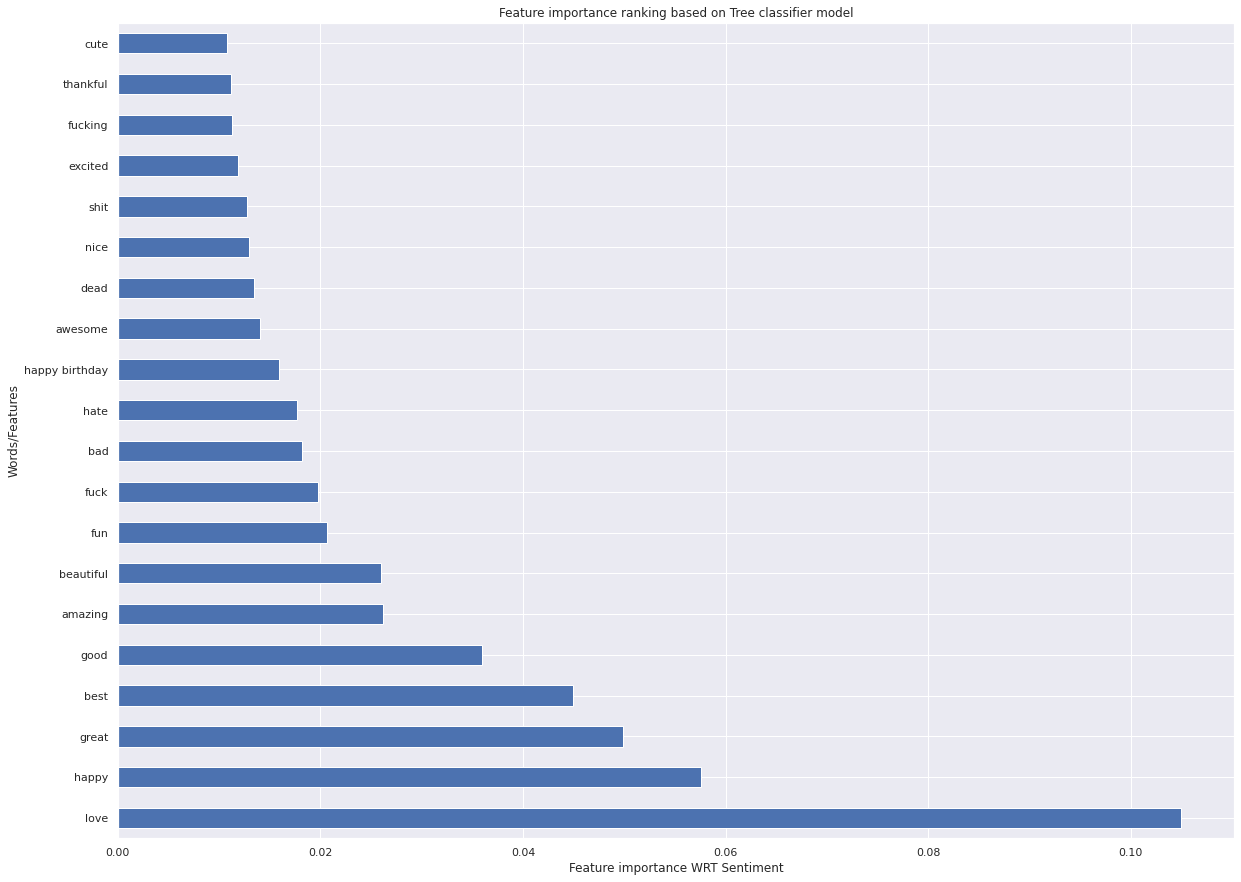

love        0.104941
happy       0.057626
great       0.049925
good        0.035969
day         0.009560
              ...   
tweet       0.001347
view        0.001083
killer      0.000183
business    0.000975
party       0.001150
Length: 200, dtype: float64

In [71]:
extra_trees(X1_train,y1_train)

### TFIDF

In [72]:
#corrmtrx(X1i_train)

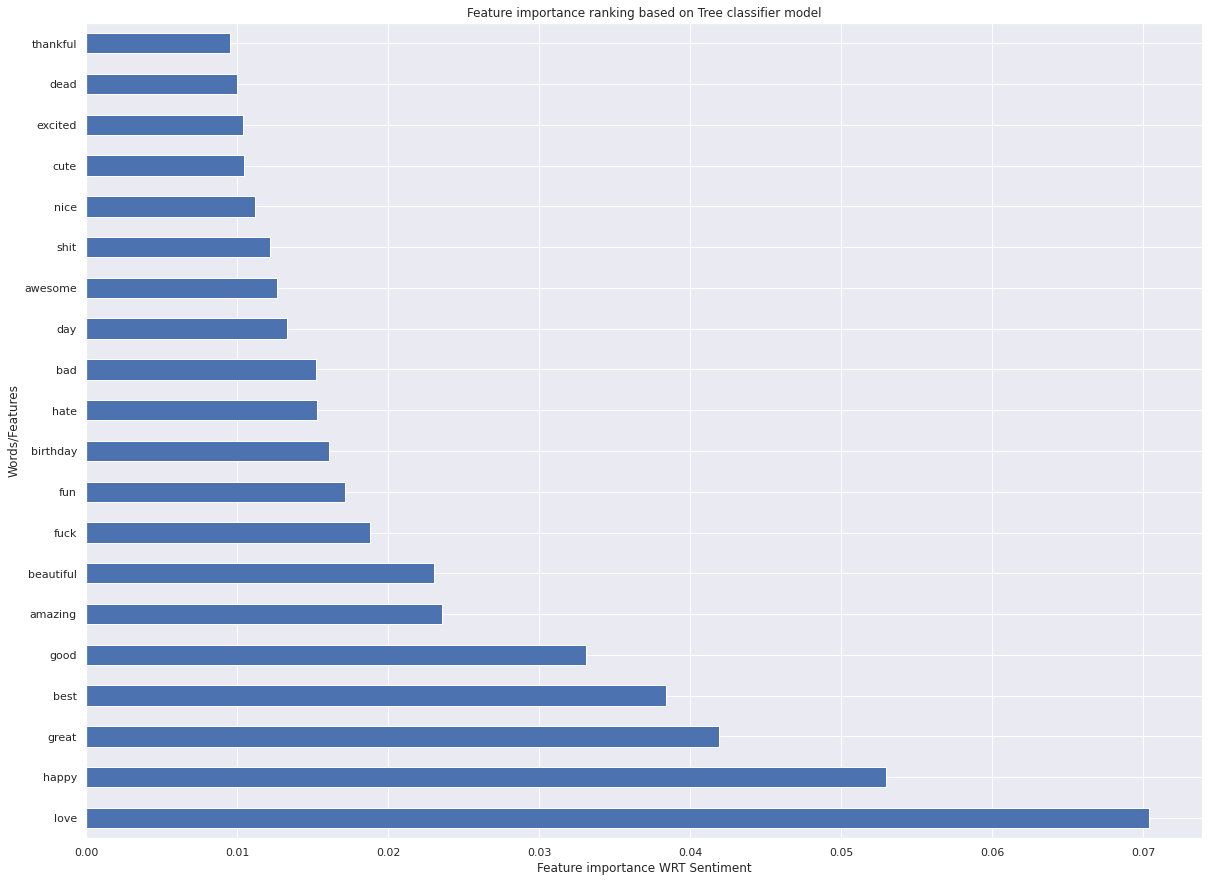

love           0.070394
happy          0.052926
great          0.041916
good           0.033065
birthday       0.016053
                 ...   
student        0.001645
interesting    0.004051
pm             0.001236
white          0.001399
thought        0.002133
Length: 200, dtype: float64

In [73]:
extra_trees(X1i_train,y1i_train)

Summary:

- TF-IDF clearly had an impact on feature importance as it must have downsacalled the frequencies of some words thus ultering their correlation to the target variable and shifting their order of precedence. 

- TF-IDF also has more evenly distributed feature importances.

## Feature Importance US Elections 



 ### Bag of Words

In [74]:
#corrmtrx(X1_train) # dataset is way too large for this.. 

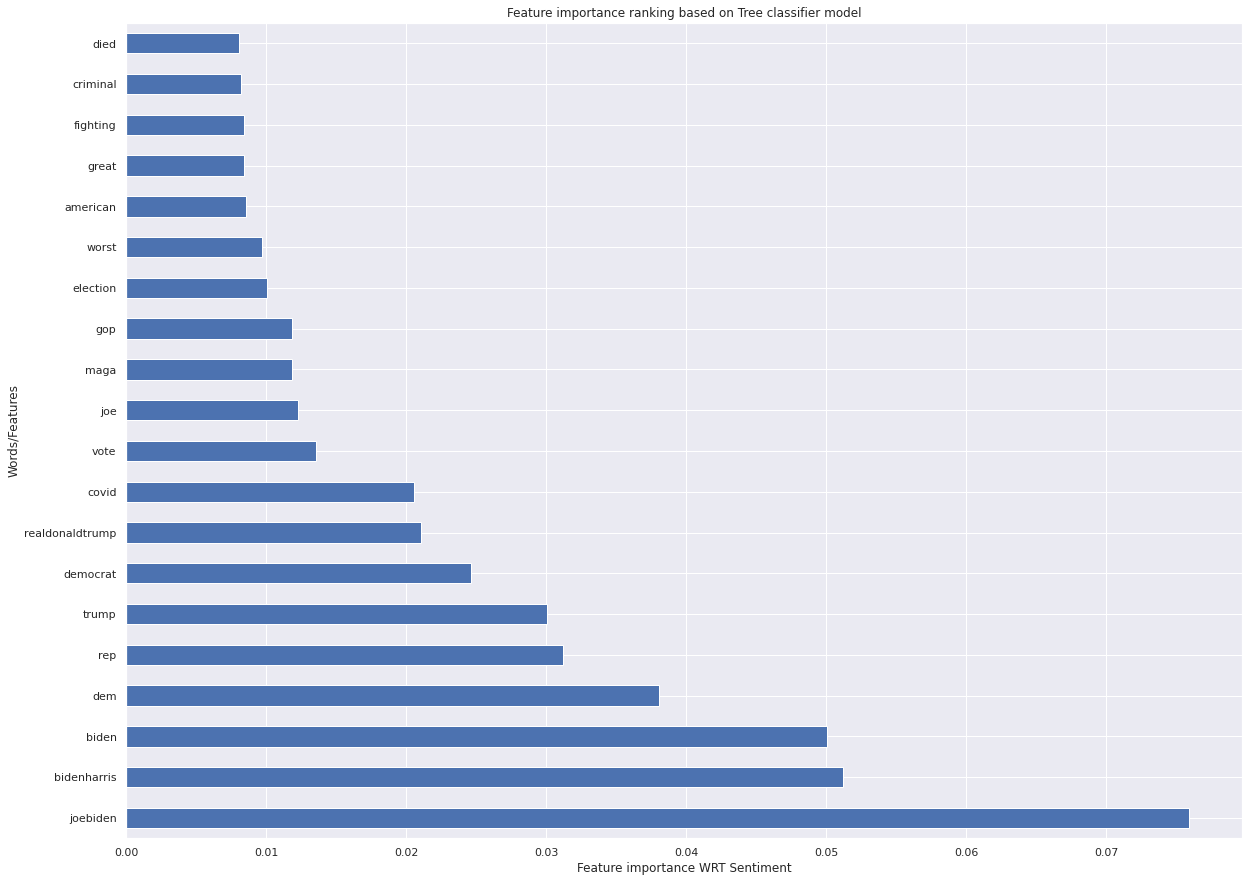

covid              0.020532
trump              0.030100
realdonaldtrump    0.021063
bidenharris        0.051239
vote               0.013594
                     ...   
democracy          0.002812
vote vote          0.000877
politics           0.001909
dem                0.038052
rep                0.031209
Length: 202, dtype: float64

In [75]:
extra_trees(X2_train,y2_train)

### TFIDF

In [76]:
#corrmtrx(X1i_train)

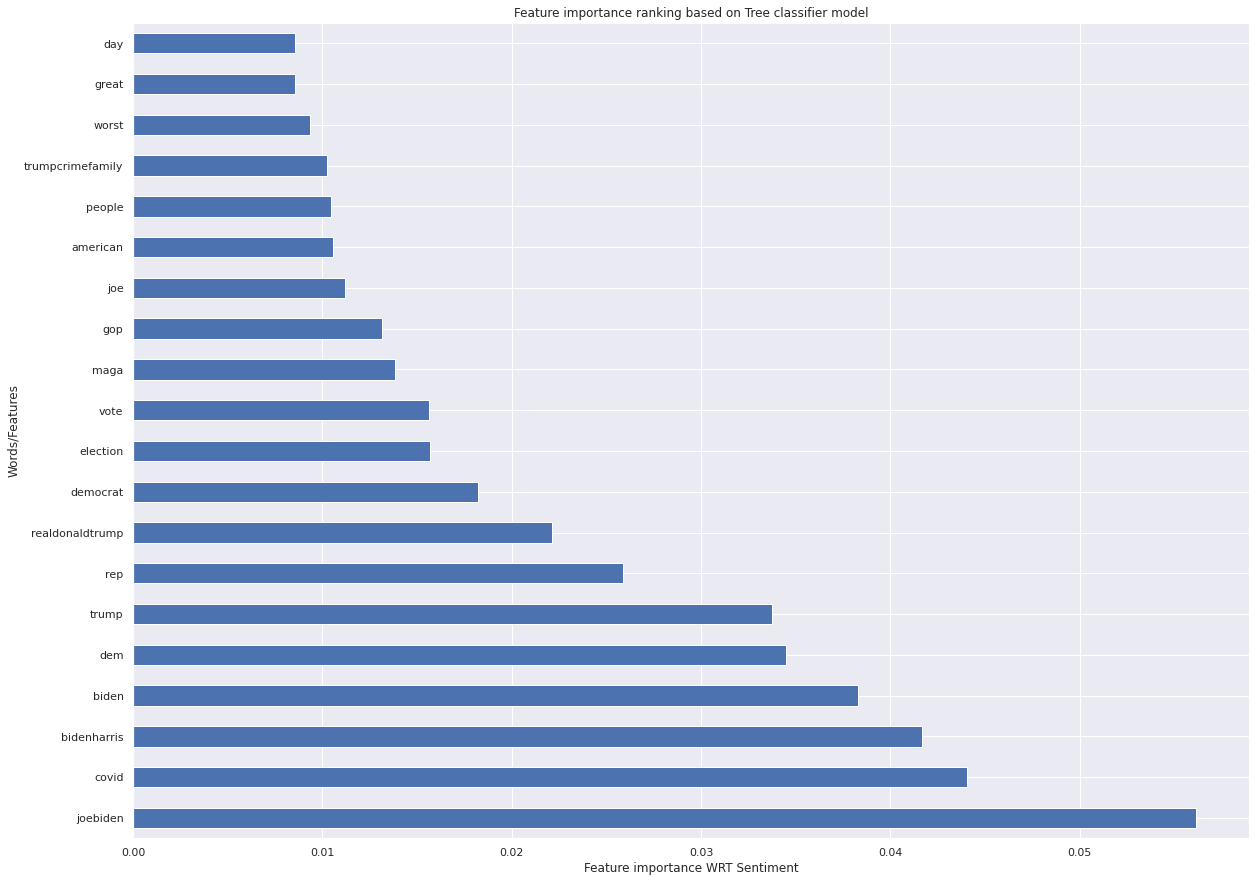

covid              0.044043
trump              0.033739
bidenharris        0.041688
realdonaldtrump    0.022153
vote               0.015613
                     ...   
policy             0.001169
pay                0.001563
worse              0.002795
dem                0.034500
rep                0.025908
Length: 202, dtype: float64

In [77]:
extra_trees(X2i_train,y2i_train)

Summary:

- TF-IDF dataset downsacalled feature importance around the board while keeping the first 3 top features the same! This is different from what occured with the other dataset. 

Overall, I am reassured to see that feature importance is highly correlated with feature frequency, this gives us some confluence to the dimenssional reduction that was done when creating our BOW and TF-IDF datasets for modeling (based on term frequency)

# 4. Model implementation and tuning: 

The approach that will be taken is to build a supervised machine learning model based on the generic tweets dataset, then test it on the elections data tweets to evaluate whether this could be an interesting tool to understand people's sentiment affiliation during an election campaign.

In this section I will:

- Train models on the generic tweets for sentiment analysis (training data) and apply the model to the test data (generic tweets) to obtain an accuracy value. Perform hyperparameter tuning and cross-validation, if necessary.

- Evaluate the same model with best performance on the 2020 US elections data and discuss how well do predictions match the sentiment labelled in the 2020 US elections data?

- Choose the model that has the best performance and visualize sentiment prediction results and the true sentiment for each of the two parties/candidates. Discuss whether NLP  analytics based on tweets is useful for political parties during election campaigns.


Scoring metrics used for evaluating the effectivness of each model were accuracy & f1 score

---

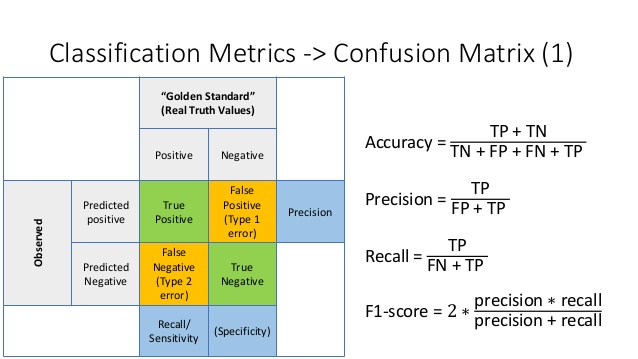

## Train and Test Models on Generic tweets Sentiment Analysis Dataset

In [ ]:
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import math
from sklearn import svm 


def omg(X_train,X_test,y_train,y_test):

  bar = progressbar.ProgressBar(maxval=7, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
  bar.start()

  # prepare models
  models = []
  models.append(('LogisticRegression', LogisticRegression()))
  models.append(('RandomForest', RandomForestClassifier()))
  models.append(('DecTree', DecisionTreeClassifier(criterion="gini"))) # selected gini to speed up computation
  models.append(('SVM', svm.SVC(kernel='linear'))) # arbitrarily selected the SVC kernel='linear' option
  models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))       
  # rule of thumb: k equals the square root of the number of points in the training data set in kNN. 
  # math.ceil(math.sqrt(X_train.shape[0]))
  models.append(('XGBoost', XGBClassifier(objective='reg:logistic')))   # according to https://www.datacamp.com/community/tutorials/xgboost-in-python we should use 
                                                                         #'''reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.'''
  #models.append(('GausNaiveBayes',GaussianNB())) 
  #models.append(('MultiNaiveBayes',MultinomialNB())) # cannot take negative values

  Training_score_acc=[]
  Testing_score_acc=[]
  #Mean_cross_validation_accuracy=[]
  #precision=[]
  #recall=[]
  f1score=[]
  idx=[]
  i=0
  
  # loop through each model
  for name, model in models:
      
    idx.append(name)
    #Cross Validation                                                           The function takes long enought time without this.. so I decided to remove it
    #score=cross_val_score(model,X_train,y_train, cv=5, scoring='accuracy')     # appears this is also the default scorer
    #Mean_cross_validation_accuracy.append(np.mean(score))
    
    #Training 
    model.fit(X_train, y_train)
    Training_score_acc.append(model.score(X_train,y_train)) # returns accuracy
    
    #Testing
    predictions=model.predict(X_test)
    Testing_score_acc.append(model.score(X_test,y_test)) 
                                                                                #confmtrx=confusion_matrix(y_test,predictions)
                                                                                #precision.append(precision_score(y_test,predictions))
                                                                                #recall.append(recall_score(y_test,predictions))
    f1score.append(f1_score(y_test,predictions))   # f1_score(y_true, y_pred)
    # update status bar
    bar.update(i+1)

  #print updated status bar
  bar.finish()
                                                                                #"Mean cross validation accuracy": Mean_cross_validation_accuracy,
  # Create a DataFrame of all the CV results
  results = pd.DataFrame({
  "Training accuracy": Training_score_acc,
  "Testing accuracy": Testing_score_acc,
  "F1 score": f1score
  }, index=idx).sort_values(by='Testing accuracy')
  
  results=round(results*100,2)

  return (results)

### Testing on US Elections just to take a look 

In [ ]:
omg(X2_train,X2_test,y2_train,y2_test)

[========================================================================] 100%


,Training accuracy,Testing accuracy,F1 score
LogisticRegression,81.52,70.63,71.91
KNN,81.63,71.93,76.19
SVM,81.19,72.32,74.52
XGBoost,80.96,75.07,77.23
DecTree,98.66,78.33,78.55
RandomForest,98.66,80.16,80.61


In [ ]:
omg(Standardize(X2_train, X2_test)[0],Standardize(X2_train, X2_test)[1],y2_train,y2_test)

[========================================================================] 100%


,Training accuracy,Testing accuracy,F1 score
KNN,79.90,68.41,71.39
SVM,87.07,70.37,71.59
LogisticRegression,85.44,73.11,74.12
XGBoost,80.96,75.07,77.23
DecTree,98.66,77.68,77.88
RandomForest,98.66,80.94,81.33


### Bag of words dataframe

**Standardized**

In [ ]:
omg(Standardize(X1_train, X1_test)[0],Standardize(X1_train, X1_test)[1],y1_train,y1_test)

[                                                                        ] N/A%/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[========================================================================] 100%


,Training accuracy,Testing accuracy,F1 score
XGBoost,75.74,75.62,84.58
KNN,84.15,81.97,85.80
DecTree,88.21,85.17,88.43
SVM,85.13,85.33,88.49
RandomForest,88.21,85.65,88.84
LogisticRegression,85.70,85.78,88.99


despite severly reducing dimensionality by butchering the dataset and using the model libraries with almost default settings, we get good results across the board. 


**Un-Standardized**

In [ ]:
omg(X1_train,X1_test,y1_train,y1_test)

[========================================================================] 100%


,Training accuracy,Testing accuracy,F1 score
XGBoost,75.74,75.62,84.58
KNN,79.93,78.27,85.03
DecTree,88.21,85.19,88.45
SVM,85.25,85.42,88.61
RandomForest,88.21,85.60,88.80
LogisticRegression,85.67,85.83,89.04


Oddly enough standardizing did not make that big a difference and for our top classifiers it reduced their accuracy so we will do without it from now on. 

the order remains the same in terms of f1 score, the dataframe above was sorted by accuracy. 

f1 score was chosen here as we are doing binary classifcation and the f1 score looks at the compramise between precision and recall and because there is an inbalance in class (although not too extreme).

1. logistic reg. based on accuracy and f1 = 89.04%
2. random forest based on accuracy and f1 = 88.8%
3. SVM on accuracy and f1 = 88.61%

### TF-IDF

**Standardized**

In [ ]:
omg(Standardize(X1i_train, X1i_test)[0],Standardize(X1i_train, X1i_test)[1],y1i_train,y1i_test)

[                                                                        ] N/A%/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[========================================================================] 100%


,Training accuracy,Testing accuracy,F1 score
XGBoost,76.29,76.07,84.82
KNN,84.73,80.65,84.63
DecTree,93.40,85.11,88.53
RandomForest,93.40,85.69,89.00
SVM,86.15,86.13,89.17
LogisticRegression,86.39,86.40,89.49


**Un-Standardized**

In [ ]:
omg(X1i_train,X1i_test,y1i_train,y1i_test)

[========================================================================] 100%


,Training accuracy,Testing accuracy,F1 score
XGBoost,76.29,76.07,84.82
KNN,86.26,82.59,86.29
DecTree,93.40,84.99,88.42
RandomForest,93.40,85.68,88.99
SVM,86.03,86.22,89.21
LogisticRegression,86.34,86.50,89.62


TF-IDF dataset yeilded slightly higher accuracies and F1 scores! 
Intrestingly enough the standardized data appears marginally less accurate, even for the models that typically prefer standardization.

**Considering all of the above we now have our champion:**

- **TF-IDF Dataset, Logistic Regression Model, Un-Standardized, accuracy=86.5%	F1=89.62%**
- **top 3 models=logistic, SVM, random forest** for later use in this section

### Best Models Learning Cure (Pre-Tuning)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

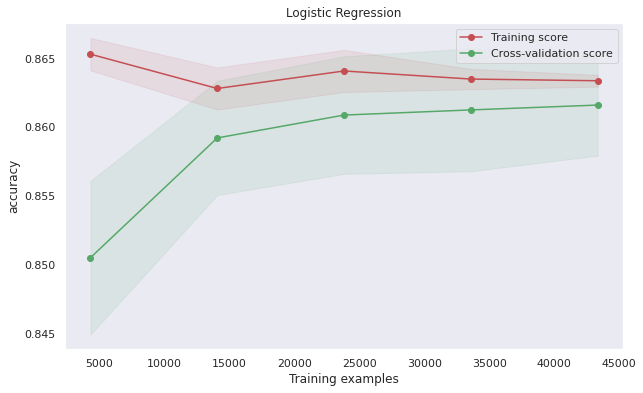

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

#plot_learning_curve(RandomForestClassifier(),'Random Forest', X2i_train, y2i_train, cv=10)

plot_learning_curve(LogisticRegression(),'Logistic Regression', X1i_train, y1i_train, cv=10)

Learning curve looks great, the validation and training curves converge nicely showing that we dont have overfit/underfit

**Comparing this to our Random Forrest Model**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

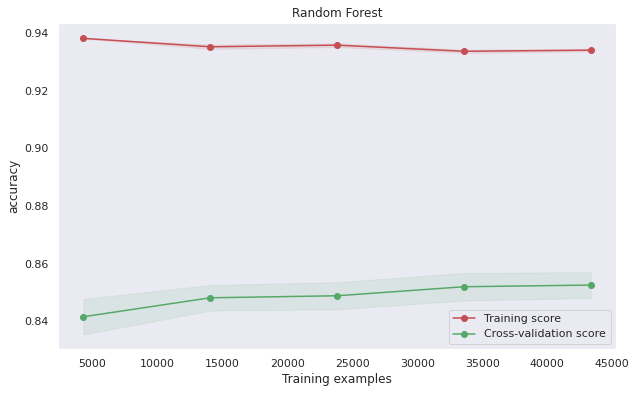

In [ ]:
plot_learning_curve(RandomForestClassifier(),'Random Forest', X1i_train, y1i_train, cv=10)

Here the variance is very high (distance between training and test score even as we approach stability) representing overfitting. In fact, the training score is flat at 93% from the start meaning that the random forrest classifier is overfitting the data right from the get go. 

The model could be modifed by reducing tree leafs,nodes. with a goal of increasing bias reducing variance to make it generalize better.

##Hyper Param tuning 


### random forest

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

- In the case of a random forest, hyperparameters include 

- the number of decision trees in the forest and 

- the number of features considered by each tree when splitting a node. 

- (The parameters of a random forest are the variables and thresholds used to split each node learned during training).

- For hyperparameter tuning, we perform many iterations of the entire K-Fold CV process, each time using different model settings. We then compare all of the models, select the best one, train it on the full training set, and then evaluate on the testing set.

n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

Following code is addaped from article linked above

''

the documentation on the random forest in Scikit-Learn. This tells us the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features). We could go read the research papers on the random forest and try to theorize the best hyperparameters, but a more efficient use of our time is just to try out a wide range of values and see what works! We will try adjusting the following set of hyperparameters:

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

''

seems like many combinations but using random search means you dont need to chech each combination. Instead we select randomly and can specify a number of random itterations that meet our tuning time constrainsts to find the best model within!

In [83]:
#initialize winning data type (unstandardized TF-IDF of Generic dataset)
X_train_best=X1i_train
X_test_best=X1i_test
y_train_best=y1i_train
y_test_best=y1i_test

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] 
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
'''pprint(random_grid)

output:
{'bootstrap': [True, False],
 'max_depth': [50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}'''

# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, # 3 fold for speed            # more fold less likeley to overfit but more time!. considered changing this for that reason but no time to wait
# search across N-iter different combinations, and use all available cores (n_jobs=-1) to speed things up!
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1000, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_best, y_train_best)

rf_random.best_params_

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed: 66.1min
[Parallel(n_jobs=-1)]: Done 933 tasks      | elapsed: 106.4min
[Parallel(n_jobs=-1)]: Done 1378 tasks      | elapsed: 156.3min
[Parallel(n_jobs=-1)]: Done 1905 tasks      | elapsed: 215.4min
[Parallel(n_jobs=-1)]: Done 2512 tasks      | elapsed: 274.4min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 330.2min finished


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1800}

1000 random samples should cover sufficient variation! 

In [87]:
def mod_acc(model, X_test_best, y_test_best):
    accuracy = model.score(X_test_best,y_test_best)
    print('Testing Performance')
    print('= {:0.2f}%.'.format(accuracy*100))
    print('___________________________________________________________________')
    return accuracy

In [ ]:
# basic as used on sentiment analysis
base_model = RandomForestClassifier() 
base_model.fit(X_train_best, y_train_best)
print ('Basic\nTraining Performance')
test_accuracy=base_model.score(X_train_best, y_train_best)
print('= {:0.2f}%.'.format(test_accuracy*100))
base_accuracy = mod_acc(base_model, X_test_best, y_test_best)

# tuned model
best_random = rf_random.best_estimator_
print ('Best\nTraining Performance')
test_accuracy=best_random.score(X_train_best, y_train_best)
print('= {:0.2f}%.'.format(test_accuracy*100))
random_accuracy = mod_acc(best_random, X_test_best, y_test_best)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Basic
Training Performance
= 93.40%.
Testing Performance
= 85.61%.
___________________________________________________________________
Best
Training Performance
= 88.26%.
Testing Performance
= 86.50%.
___________________________________________________________________
Improvement of 1.04%.


Using gridsearch instead for validation 

In [ ]:
# using gridsearch with less variation of our hyperparamaters 1 * 4 * 2 * 3 * 3 * 4 = 288 combinations of settings.

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [100, None],
    'max_features': ['auto'],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2,5],
    'n_estimators': [500,1000]
}

'''{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1800}'''

# Create a model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the random search model
grid_search.fit(X_train_best, y_train_best)

grid_search.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  48 | elapsed:  4.7min remaining:  7.2min
[Parallel(n_jobs=-1)]: Done  44 out of  48 | elapsed:  7.6min remaining:   41.5s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  7.9min finished


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
# basic as used on sentiment analysis
base_model = RandomForestClassifier() 
base_model.fit(X_train_best, y_train_best)
print ('Basic\nTraining Performance')
test_accuracy=base_model.score(X_train_best, y_train_best)
print('= {:0.2f}%.'.format(test_accuracy*100))
base_accuracy = mod_acc(base_model, X_test_best, y_test_best)

# grid search optimized
best_grid = grid_search.best_estimator_
print ('Best\nTraining Performance')
test_accuracy=best_grid.score(X_train_best, y_train_best)
print('= {:0.2f}%.'.format(test_accuracy*100))
grid_accuracy = mod_acc(best_grid, X_test_best, y_test_best)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Basic
Training Performance
= 93.39%.
Testing Performance
= 85.70%.
___________________________________________________________________
Best
Training Performance
= 88.24%.
Testing Performance
= 86.52%.
___________________________________________________________________
Improvement of 0.96%.


Gridsearch yeilded better results! so we will go with the newly gridsearch tuned paramaters of

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

Learning Curve Before:


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

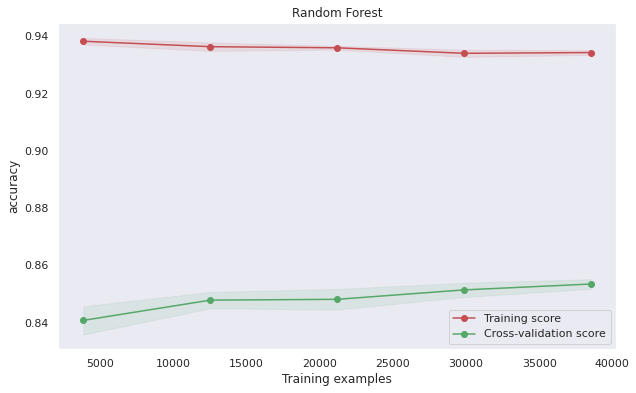

In [ ]:
plot_learning_curve(RandomForestClassifier(),'Random Forest', X1i_train, y1i_train, cv=5)

Learning Curve After:

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

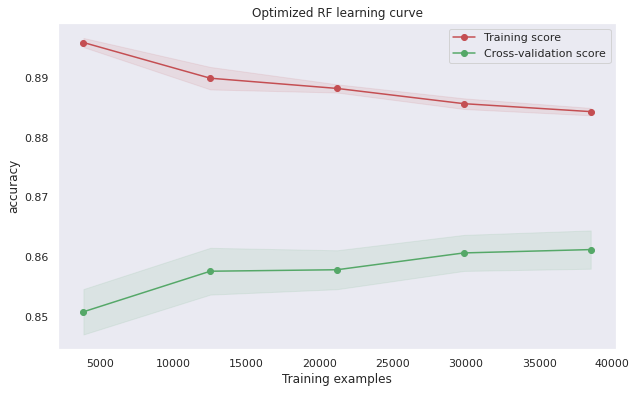

In [ ]:
#plot_learning_curve(rf_random.best_estimator_,"Optimized RF learning curve", X1i_train, y1i_train, cv=10)
plot_learning_curve(grid_search.best_estimator_,"Optimized RF learning curve", X1i_train, y1i_train, cv=5)

We have improvement.  

We fixed some of the overfitting by constraining our models hyperparams to yeild a lower variance model

amazing! hyper param tuning worked but we will try out logitic regression for comparison

### Logistic Regression

In [143]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 

clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2','elasticnet'],'C':[0.001,.003,0.009,0.01,0.03, 0.09,0.1, 0.3,0.9,1,1.1,1.3,1.6,1.9]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy',cv=5)
grid_clf_acc.fit(X_train_best,y_train_best)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test_best)
predictions = [round(value) for value in y_pred_acc]
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test_best, predictions)))

Accuracy Score : 0.8646802325581395


In [144]:
# basic as used on sentiment analysis
base_model = LogisticRegression()
base_model.fit(X_train_best, y_train_best)
print ('Basic\nTraining Performance')
test_accuracy=base_model.score(X_train_best, y_train_best)
print('= {:0.2f}%.'.format(test_accuracy))
base_accuracy = mod_acc(base_model, X_test_best, y_test_best)

# grid search optimized
best_grid = grid_clf_acc.best_estimator_
print ('Best\nTraining Performance')
test_accuracy=best_grid.score(X_train_best, y_train_best)
print('= {:0.2f}%.'.format(test_accuracy*100))
grid_accuracy = mod_acc(best_grid, X_test_best, y_test_best)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Basic
Training Performance
= 0.86%.
Testing Performance
= 86.50%.
___________________________________________________________________
Best
Training Performance
= 86.35%.
Testing Performance
= 86.47%.
___________________________________________________________________
Improvement of -0.03%.


In [145]:
grid_clf_acc.best_params_

{'C': 1.6, 'penalty': 'l2'}

that is strange I expected more from this greidsearch maybe range of hyper params was bad or we are constrained by the data

Before

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

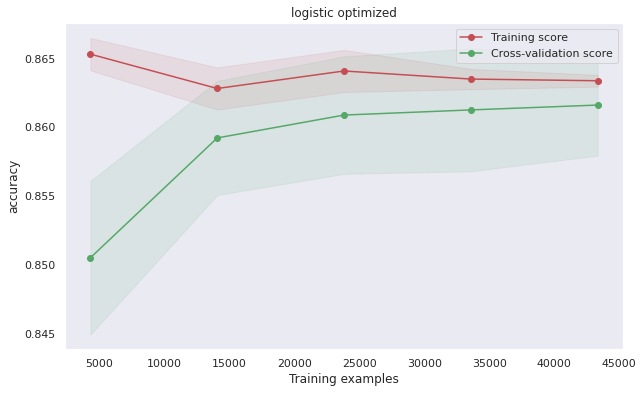

In [149]:
plot_learning_curve(LogisticRegression(),'logistic optimized', X_train_best, y_train_best, cv=10)

After

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

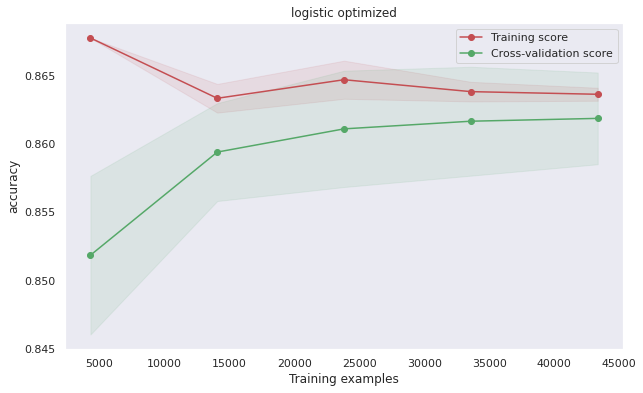

In [150]:
plot_learning_curve(grid_clf_acc.best_estimator_,'logistic optimized', X_train_best, y_train_best, cv=10)

As expected learning curves are very similar, Untuned logistic regression was already great in terms of bias variance tradeoff so we will go with that for the rest of the analysis.

## Evaluate the same model with best performance on the entirety of the 2020 US elections data (sentiment analysis on the labeled election data tweets using the generic tweet trained model)

https://stackoverflow.com/questions/44711827/testing-and-training-sets-with-different-number-of-features-using-tf-idf

'figure out all possible features and their IDF weights during the training; at testing time you use features and weights found based on training dataset. Don't compute IDF on test documents.'

https://stackoverflow.com/questions/29788047/keep-tfidf-result-for-predicting-new-content-using-scikit-for-python




**Redo Training TF-IDF**

In [78]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# initialize the TFIDF vectorizer 
cv=TfidfVectorizer(min_df=0.001)    # ignore terms with document frequency under 1% some needed feature reduction is done here
''' smooth_idf        smooth_idf=True by default
    weights by adding one to document frequencies, as if an
    extra document was seen containing every term in the collection
    exactly once. Prevents zero divisions.'''

# fit it to corpus essentiually tokanizing it and creating a vocabulary where each word is assigned a unique number representation!
X=cv.fit_transform(corpus_1)

# can also create bag of words using generated vocab on dataset
tfidf_1=X
#print(tfidf_1.shape)
#print(tfidf_1.toarray())

# Create the dataframe
words=cv.get_feature_names()
tfidf_df_1=pd.DataFrame(tfidf_1.todense(),columns=words) # to dense just cnverts the bag of words object into a matrix

# NEVER USE SORTED! U LOOSE THE INDEX AND THEN LOOSE YOUR MIND
#print(tfidf_df_1.sum().sort_values(ascending=False))
a=tfidf_df_1.sum().sort_values(ascending=False).index
tfidf_df_1=tfidf_df_1.reindex(columns=a)
# now the dataframe has been re-ordered with the highest frequency terms showing first (trump&covid are top two)

# Create a new dataframe containing all the columns and change bow to only contain top 200 features. only taking an eigth for computation time sake
inter_tfidf_1=tfidf_df_1
#cut=math.ceil(inter_tfidf_1.shape[0]/8)
#tfidf_df_1=inter_tfidf_1.iloc[:cut,:200]

# refrencing back to inter_1 which houses BOW for the all features in a given tweet
cut=math.ceil(inter_1.shape[0]/8)
#bow_df_1=pd.concat([inter_1.iloc[:cut,:200], ndf_1], axis=1) # cut number of rows in half and only look at the the most frequent 200 words

#does not work
#bow_df_1=pd.join([inter_1.iloc[:,:200].sample(cut), ndf_1], axis=1)

tfidf_df_1=inter_tfidf_1.iloc[:,:200].sample(cut, random_state=0).join(ndf_1, how='left')



'''# add the target colum
tfidf_df_1=pd.concat([tfidf_df_1, ndf_1], axis=1)
tfidf_df_1.head(3)'''

# drop rows with nan 
tfidf_df_1.dropna(inplace=True)
tfidf_df_1.head()

,love,happy,great,good,birthday,best,day,amazing,beautiful,today,time,fun,friend,people,snail,transponder,trecru,life,year,cute,hope,guy,fuck,sea,thing,monster,giant,encounter,girl,nice,night,thankful,awesome,wait,win,man,perfect,trump,thanksgiving,morning,...,top,hair,st,ya,coming,sexy,local,htt,killed,tweet,hell,forward,election,america,hand,view,full,national,care,lost,party,business,eye,incredible,share,winter,fall,lady,month,talk,literally,holiday,money,glad,student,interesting,pm,white,thought,sentiment
308646,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
350859,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.411794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
312939,0.000000,0.0,0.0,0.255274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
509911,0.412993,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
235580,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [104]:
X_train=tfidf_df_1.iloc[:,:-1]
y_train=tfidf_df_1.iloc[:,-1]

Train the model with the best parameters (untuned)

In [105]:
model=LogisticRegression()
grid_values = {'penalty': ['l2'],'C':[1]} # winning model specs
grid_clf_acc = GridSearchCV(model, param_grid = grid_values,scoring = 'accuracy',cv=5)
grid_clf_acc.fit(X_train,y_train)


#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_train)
predictions = [round(value) for value in y_pred_acc]
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_train,predictions)))

Accuracy Score : 0.8641840724429134


**Now transform test set using the training set valcabulary by simply calling transform and not fit**

In [106]:
cv.fit(corpus_1)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=0.001, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [109]:
X=cv.transform(corpus_2)

# can also create bag of words using generated vocab on dataset
tfidf=X

# Create the dataframe
words=cv.get_feature_names()
tfidf_df=pd.DataFrame(tfidf.todense(),columns=words) # to dense just cnverts the bag of words object into a matrix

In [110]:
# NEVER USE SORTED! U LOOSE THE INDEX AND THEN LOOSE YOUR MIND
# print(tfidf_df_1.sum().sort_values(ascending=False))
a=tfidf_df.sum().sort_values(ascending=False).index
tfidf_df=tfidf_df.reindex(columns=a)
# now the dataframe has been re-ordered with the highest frequency terms that are shared by the vocabularies

In [111]:
# Add final sentiment!
tfidf_df=pd.concat([tfidf_df, ndf_2.iloc[:,-1]], axis=1)
tfidf_df.head()

,trump,realdonaldtrump,vote,election,maga,people,american,death,president,america,voted,day,voting,year,lie,today,time,country,state,win,doctor,number,donald,great,going,news,week,campaign,man,person,thing,died,life,watch,family,call,worst,national,keep,left,...,coach,trlday,classic,ht,htt,vibe,cheapvacationss,moon,character,porn,creative,mix,skin,detail,secret,drink,meteorite,size,sir,download,thanksgiving,themostbeautifulfinale,dirty,tho,lit,hiring,cup,thweeksary,thx,shooting,shoe,dating,dance,mistake,cutie,cutest,cute,holiday,thankful,sentiment
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.621833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.487064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.631607,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [125]:
tfidf_df=tfidf_df[np.intersect1d(tfidf_df_1.columns, tfidf_df.columns)]
a=tfidf_df.sum().sort_values(ascending=False).index
tfidf_df=tfidf_df.reindex(columns=a)
tfidf_df

,sentiment,trump,vote,election,people,death,america,day,year,today,time,win,great,going,news,week,man,person,thing,life,watch,family,call,national,keep,black,dead,help,killed,white,good,lost,shit,woman,money,live,hard,month,care,hell,...,mom,glad,dog,fan,view,food,ur,season,bday,song,incredible,blessed,gift,monster,meet,sea,awesome,music,smile,movie,lovely,fantastic,loving,sexy,trecru,transponder,art,hair,thanksgiving,thankful,sweet,snail,congrats,cute,favorite,nationaldogday,htt,gorgeous,holiday,encounter
0,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.621833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.78315,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.631607,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.464939,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2548,1,0.0,0.802772,0.000000,0.0,0.000000,0.0,0.0,0.0,0.596287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2549,0,0.0,0.000000,0.000000,0.0,0.646284,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2550,0,0.0,0.000000,0.510115,0.0,0.000000,0.0,0.0,0.0,0.000000,0.368969,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,

In [136]:
tfidf_df=tfidf_df[tfidf_df_1.columns]

In [137]:
tfidf_df

,love,happy,great,good,birthday,best,day,amazing,beautiful,today,time,fun,friend,people,snail,transponder,trecru,life,year,cute,hope,guy,fuck,sea,thing,monster,giant,encounter,girl,nice,night,thankful,awesome,wait,win,man,perfect,trump,thanksgiving,morning,...,top,hair,st,ya,coming,sexy,local,htt,killed,tweet,hell,forward,election,america,hand,view,full,national,care,lost,party,business,eye,incredible,share,winter,fall,lady,month,talk,literally,holiday,money,glad,student,interesting,pm,white,thought,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.621833,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.78315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596287,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.368969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.510115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [128]:
# fit model on generic tweets
model=LogisticRegression()
model.fit(X_train,y_train)

# Score model on american election dataset
model.score(tfidf_df.iloc[:,:-1],tfidf_df.iloc[:,-1])

0.582680250783699

In [129]:
#Predict values based on new parameters
y_pred_acc = model.predict(tfidf_df.iloc[:,:-1])
predictions = [round(value) for value in y_pred_acc]
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(tfidf_df.iloc[:,-1],predictions)))

Accuracy Score : 0.582680250783699


The model gives predictions with an accuracy of 58.3% to match the sentiment labelled in the US elections data. The simple model structure (traditional machine learning model) used and the fact that the model is trained based on generic tweets makes this low accuracy expected. In fact, research has shown that certain structures of deep learnig models are more approriate for sentiment analysis in the NLP field.
In regard to the importance of this model to election campaigns, it is important to visualize the prediction results of the model based on political party and predicted sentiment to check for any possible bias in the model.

We visualize the sentiment prediction results and the true sentiment for each of the 3 parties.


## Visualizing sentiment prediction results vs true sentiment for each of the two parties/candidates. 

Here I will also discuss whether NLP analytics based on tweets is useful for political parties during election campaigns.

In [138]:
tfidf_df.drop(columns='sentiment',inplace=True)
tfidf_df=pd.concat([tfidf_df,ndf_2], axis=1)
tfidf_df

,love,happy,great,good,birthday,best,day,amazing,beautiful,today,time,fun,friend,people,snail,transponder,trecru,life,year,cute,hope,guy,fuck,sea,thing,monster,giant,encounter,girl,nice,night,thankful,awesome,wait,win,man,perfect,trump,thanksgiving,morning,...,st,ya,coming,sexy,local,htt,killed,tweet,hell,forward,election,america,hand,view,full,national,care,lost,party,business,eye,incredible,share,winter,fall,lady,month,talk,literally,holiday,money,glad,student,interesting,pm,white,thought,dem,rep,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.621833,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.78315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596287,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
2549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.368969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.510115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [140]:
vis=pd.DataFrame()
# take true sent values 
vis['dem']=tfidf_df['dem']
vis['rep']=tfidf_df['rep']
vis['sentiment_true']=tfidf_df.iloc[:,-1]
predictions = model.predict(tfidf_df.iloc[:,:-3])
vis['sentiment_pred']=predictions

viss=[]
for i in range(len(vis)):
  if vis.dem[i]==1:
    viss.append('Democrat')
  elif vis.rep[i]==1:
    viss.append('Republican')
  else:
    viss.append('None')

vis['Party']=pd.Series(viss)

rep_df=vis[vis['rep']==1]
dem_df=vis[vis['dem']==1]

vis

,dem,rep,sentiment_true,sentiment_pred,Party
0,0,1,0,1,Republican
1,0,0,0,0,None
2,0,1,0,0,Republican
3,1,0,1,0,Democrat
4,1,0,1,1,Democrat
...,...,...,...,...,...
2547,0,0,1,1,None
2548,1,0,1,1,Democrat
2549,0,0,0,0,None
2550,0,1,0,0,Republican


In [141]:
def prediction_check (row):
    if row['sentiment_true'] == row['sentiment_pred']:
        return 'Correct Predictions'
    else:
        return 'Wrong Predictions'
    
vis['Prediction_check'] = vis.apply(lambda row: prediction_check(row),axis=1)
vis

,dem,rep,sentiment_true,sentiment_pred,Party,Prediction_check
0,0,1,0,1,Republican,Wrong Predictions
1,0,0,0,0,None,Correct Predictions
2,0,1,0,0,Republican,Correct Predictions
3,1,0,1,0,Democrat,Wrong Predictions
4,1,0,1,1,Democrat,Correct Predictions
...,...,...,...,...,...,...
2547,0,0,1,1,None,Correct Predictions
2548,1,0,1,1,Democrat,Correct Predictions
2549,0,0,0,0,None,Correct Predictions
2550,0,1,0,0,Republican,Correct Predictions


Text(0.5, 1.0, 'Model Performance per political party')

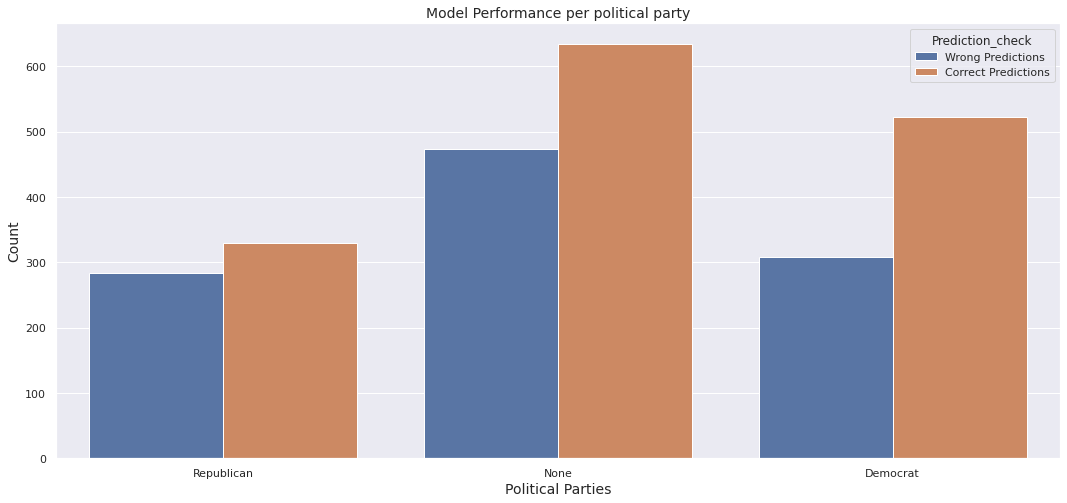

In [142]:
### Evaluate the relationship between political parties and predictions
ax=sns.countplot(x='Party',hue='Prediction_check', data = vis)
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Political Parties', fontsize=14)
ax.set_title('Model Performance per political party', fontsize=14)

model performs better when classifying sentiment of democrats than republicans as seen by the plot above. 

the model's accuracy for both parties is still at 55-60%, which is not enough to justify targeting campaigns. (Again, it is important to note that this model could be further optimized)

In [1]:
'''from sklearn.metrics import confusion_matrix
cfmtrx=confusion_matrix(dem_df['sentiment_true'],dem_df['sentiment_pred'])
plt.figure(1)
sns.heatmap(cfmtrx, annot=True, fmt='g')
plt.title('Democrat Confusion Matrix')

plt.figure(2)
# tweets distributions of polical party with setimnet
ax = sns.countplot(x='sentiment_pred',data=dem_df, hue='sentiment_true')
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Predicted sentiment', fontsize=14)
ax.set_xticklabels(labels=['Negative','Positive'])

ax.set_title('Democrats: Count of Predicted Sentiment with hue of True sentiment', fontsize=14)'''

"from sklearn.metrics import confusion_matrix\ncfmtrx=confusion_matrix(dem_df['sentiment_true'],dem_df['sentiment_pred'])\nplt.figure(1)\nsns.heatmap(cfmtrx, annot=True, fmt='g')\nplt.title('Democrat Confusion Matrix')\n\nplt.figure(2)\n# tweets distributions of polical party with setimnet\nax = sns.countplot(x='sentiment_pred',data=dem_df, hue='sentiment_true')\nax.set_ylabel('Count', fontsize=14)\nax.set_xlabel('Predicted sentiment', fontsize=14)\nax.set_xticklabels(labels=['Negative','Positive'])\n\nax.set_title('Democrats: Count of Predicted Sentiment with hue of True sentiment', fontsize=14)"

## Multi-Class Classification model on negative sentiment US Election tweets

Split the negative 2020 US elections tweets into training data (70%) and test data (30%). Use true sentiment labels in the 2020 US elections data instead of your predictions from the previous part. Choose three algorithms from classification algorithms (logistic regression, k-NN, Naive Bayes, SVM, decision trees, ensembles (RF, XGBoost)),

### Encode negative sentiment reasons

In [172]:
# text sentiment negative_reason New	word_count_og

In [173]:
# replace everything but the last 3 columns with the dataframe named inter that houses all the features

ndf_f=df_2[['dem','rep']]
ndf_f['sentiment']=df_2['sentiment']
ndf_f['negative_reason']=df_2['negative_reason']

# essentially fill the gap with inter creating the full bag of words dataframe + the 2 new features 

fdf=pd.concat([inter_2.iloc[:,:500], ndf_f], axis=1)

# Remove all instances where sentiment is positive as they are irrelevant to our analysis
fdf=fdf[fdf['sentiment']==0]

#Remove sentiment column
fdf.drop(['sentiment'],axis=1, inplace=True)

(array([405.,   0., 202.,   0.,   0., 215.,   0., 220.,   0., 222.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

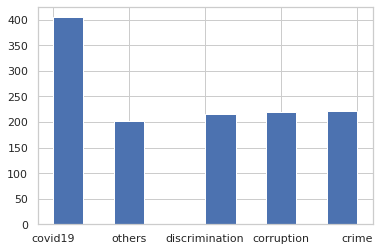

In [174]:
plt.hist(fdf.negative_reason)

In [175]:
fdf.shape

(1264, 503)

**This is a small dataset and will really hurt our model building abilities due as the dataset is likeley not suffiently diverse. non the less I will continue with the exercise for testing purposes.**

encode negative reason

In [176]:
encode=  { 'others':0, 
'discrimination':1,
'corruption':2,
 'crime':3,
 'covid19':4
 }
fdf['Negative_Reason_Encoded'] = fdf['negative_reason'].map(encode).astype(int)
fdf.drop(columns='negative_reason', axis=1, inplace=True)

### Create the data (Bag of Words)

In [177]:
fdf

,covid,trump,realdonaldtrump,bidenharris,vote,joebiden,biden,election,maga,people,day,american,covidvirus,america,death,gop,president,democrat,year,joe,voted,today,time,voting,trumpcrimefamily,lie,ballot,republican,lockdown,win,country,voter,donald,kag,going,state,watch,vote bidenharris,rally,great,...,maga elitest,obama,dumpster,ago,trumpislosing,year ripping,weekend,belief,whining,tired,yeah,surge,share,wow,set,thinking,update,understand,system,tax ten,senatemajldr,ten year,anti,ten,true,save,word,votered,trump paid,trump covid,stay,bidencrimefamiiy,biden win,wake,fire,action,socialism,dem,rep,Negative_Reason_Encoded
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
6,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2543,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2544,1,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
2549,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


#### Bag of Words Split

Split the generic tweets randomly into training data (70%) and test data (30%)

In [178]:
Xf = fdf.drop(['Negative_Reason_Encoded'],axis=1)
yf = fdf['Negative_Reason_Encoded']
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, random_state=0, test_size=0.3)

### Create Tfidf dataset


#### Create The Data

In [179]:
tfidf_fdf=pd.concat([tfidf_df_2.iloc[:,:-3], ndf_f], axis=1)

# Remove all instances where sentiment is positive as they are irrelevant to our analysis
tfidf_fdf=tfidf_fdf[tfidf_fdf['sentiment']==0]
# Remove sentiment column
tfidf_fdf.drop(['sentiment'],axis=1, inplace=True)
tfidf_fdf

,covid,trump,bidenharris,realdonaldtrump,vote,joebiden,biden,election,maga,people,american,day,covidvirus,democrat,america,president,death,gop,voted,trumpcrimefamily,time,today,year,joe,voting,kag,case,lie,win,republican,ballot,country,voter,life,lockdown,going,rally,kamalaharris,poll,donald,...,candidate,mask,sign,future,lose,talk,fact,crime,side,politics,fight,wisconsin,folk,record,find,bidenharristosaveamerica,human,prison,drop,wonder,seriously,school,ad,gun,free,nthe,sure,red,elected,hey,losing,georgia,brettfavre,gonna,policy,pay,worse,dem,rep,negative_reason
0,0.000000,0.0,0.21549,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.350987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,covid19
1,0.232141,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,others
2,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.250014,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.435036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,covid19
5,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.342769,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,discrimination
6,0.000000,0.0,0.00000,0.225129,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.308251,0.308251,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.342647,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,discrimination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,crime
2543,0.184344,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.307997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,discrimination
2544,0.173596,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.243843,0.0,0.000000,0.523604,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.290040,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Encode Neative Reason

In [180]:
encode=  { 'others':0, 
'discrimination':1,
'corruption':2,
 'crime':3,
 'covid19':4
 }
tfidf_fdf['Negative_Reason_Encoded'] = tfidf_fdf['negative_reason'].map(encode).astype(int)
tfidf_fdf.drop(columns='negative_reason', axis=1, inplace=True)
tfidf_fdf.head(3)

,covid,trump,bidenharris,realdonaldtrump,vote,joebiden,biden,election,maga,people,american,day,covidvirus,democrat,america,president,death,gop,voted,trumpcrimefamily,time,today,year,joe,voting,kag,case,lie,win,republican,ballot,country,voter,life,lockdown,going,rally,kamalaharris,poll,donald,...,candidate,mask,sign,future,lose,talk,fact,crime,side,politics,fight,wisconsin,folk,record,find,bidenharristosaveamerica,human,prison,drop,wonder,seriously,school,ad,gun,free,nthe,sure,red,elected,hey,losing,georgia,brettfavre,gonna,policy,pay,worse,dem,rep,Negative_Reason_Encoded
0,0.000000,0.0,0.21549,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,4
1,0.232141,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.000000,0.0,0.00000,0.0,0.0,0.0,0.250014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.435036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,4


#### TFIDF split

Split the generic tweets randomly into training data (70%) and test data (30%)

In [181]:
Xfi = tfidf_fdf.drop(['Negative_Reason_Encoded'],axis=1)
yfi = tfidf_fdf['Negative_Reason_Encoded']
Xfi_train, Xfi_test, yfi_train, yfi_test = train_test_split(Xfi, yfi, random_state=0, test_size=0.3)

## Test Models on the negative tweets from 2020 us elections

In [182]:

# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import math
from sklearn import svm 


def omg_f(X_train,X_test,y_train,y_test):

  bar = progressbar.ProgressBar(maxval=7, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
  bar.start()

  # prepare top 3 models (logistic, dec tree, random forest )
  models = []
  models.append(('LogisticRegression', LogisticRegression(multi_class='ovr'))) # fix for multi class one vs rest!
  models.append(('RandomForest', RandomForestClassifier()))
  models.append(('DecTree', DecisionTreeClassifier(criterion="gini"))) # selected gini to speed up computation


  Training_score_acc=[]
  Testing_score_acc=[]
  Mean_cross_validation_accuracy=[]
  #precision=[]
  #recall=[]
  #f1score=[]
  idx=[]
  i=0
  
  # loop through each model
  for name, model in models:
      
    idx.append(name)
    #Cross Validation                                                           The function takes long enought time without this.. so I decided to remove it
    score=cross_val_score(model,X_train,y_train, cv=5, scoring='accuracy')     # appears this is also the default scorer
    Mean_cross_validation_accuracy.append(np.mean(score))
    
    #Training 
    model.fit(X_train, y_train)
    Training_score_acc.append(model.score(X_train,y_train)) # returns accuracy
    
    #Testing
    
    Testing_score_acc.append(model.score(X_test,y_test)) 
                                                                                #confmtrx=confusion_matrix(y_test,predictions)
                                                                                #precision.append(precision_score(y_test,predictions))
    #predictions=model.predict(X_test)                                                                           #recall.append(recall_score(y_test,predictions))
    #f1score.append(f1_score(y_test,predictions))
    # update status bar
    bar.update(i+1)

  #print updated status bar
  bar.finish()
                                                                                #"Mean cross validation accuracy": Mean_cross_validation_accuracy,
  # Create a DataFrame of all the CV results
  results = pd.DataFrame({"Mean cross validation accuracy": Mean_cross_validation_accuracy,
  "Training accuracy": Training_score_acc,
  "Testing accuracy": Testing_score_acc,
  }, index=idx).sort_values(by='Testing accuracy')
  
  results=round(results*100,2)

  return (results)

### Bag of words dataframe

**Standardized**

In [183]:
omg_f(Standardize(Xf_train, Xf_test)[0],Standardize(Xf_train, Xf_test)[1],yf_train,yf_test)

[========================================================================] 100%


,Mean cross validation accuracy,Training accuracy,Testing accuracy
LogisticRegression,27.26,91.63,31.32
RandomForest,29.41,96.38,33.68
DecTree,26.47,96.38,33.68


**Un-Standardized**

In [184]:
omg_f(Xf_train,Xf_test,yf_train,yf_test)

[========================================================================] 100%


,Mean cross validation accuracy,Training accuracy,Testing accuracy
DecTree,27.60,96.38,32.11
LogisticRegression,28.05,72.85,32.37
RandomForest,30.88,96.38,35.53


### TF-IDF

**Standardized**

In [185]:
omg_f(Standardize(Xfi_train, Xfi_test)[0],Standardize(Xfi_train, Xfi_test)[1],yfi_train,yfi_test)

[========================================================================] 100%


,Mean cross validation accuracy,Training accuracy,Testing accuracy
LogisticRegression,22.85,58.94,28.42
DecTree,27.48,96.38,31.32
RandomForest,30.20,96.38,32.89


**Un-Standardized**

In [186]:
omg_f(Xfi_train,Xfi_test,yfi_train,yfi_test)

[========================================================================] 100%


,Mean cross validation accuracy,Training accuracy,Testing accuracy
DecTree,28.73,96.38,28.68
RandomForest,29.18,96.38,30.53
LogisticRegression,32.13,38.80,32.89


**Summary**

here the bag of words Dataset, unstandardized  W/ Random forest evidently dominates with training score of 96.38 and test score	35.00

Severe overfitting and really poor generalization but highest amung the other models

## Learning Curves

### Random Forest

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

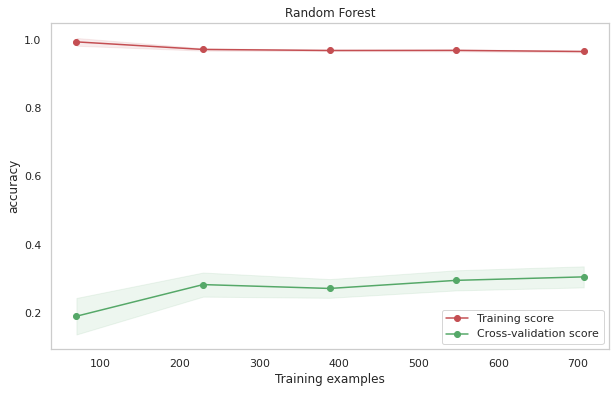

In [199]:
plot_learning_curve(RandomForestClassifier(),'Random Forest', Xfi_train, yfi_train, cv=5)

huge gap between them. really over-fit. very high variance model.

### logistic Reg

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

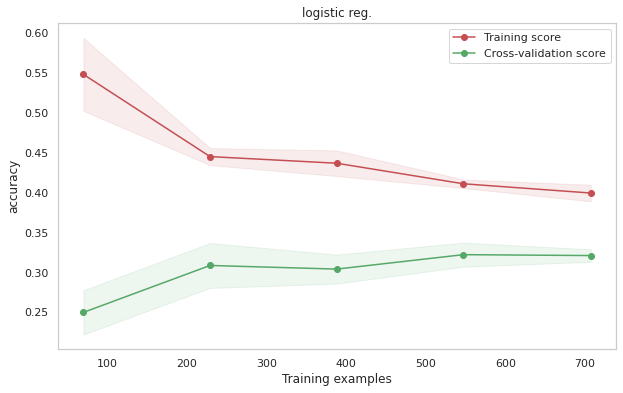

In [200]:
plot_learning_curve(LogisticRegression(multi_class='ovr'),'logistic reg.', Xfi_train, yfi_train, cv=5)

This is better, but still very low accuracy. we see the curves getting closer and the gap narrowing. moving from overfit to less and less overfit but converging to a low accuracy.

### Dec Tree

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

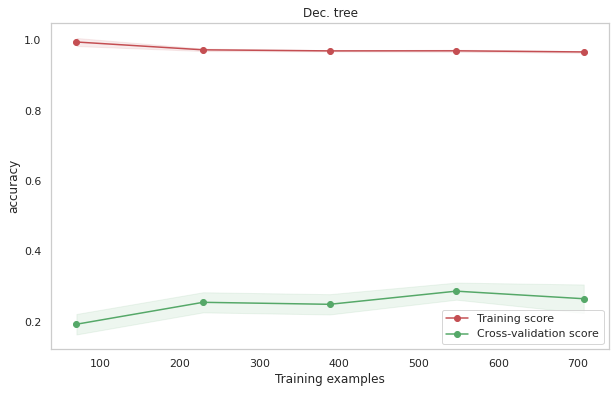

In [201]:
plot_learning_curve(DecisionTreeClassifier(criterion="gini"),'Dec. tree', Xfi_train, yfi_train, cv=5)

same as RF but even worst. tree is too complex and too well fit to traiining data so does not generalize well to new data. really huge gap.. 

Summary, although Random forest gave the best accuracy logistic reg looks like a better model from a bias variance tradeoff standoff. or is less overfit. 

##Hyper Param tuning 


### random forest

In [190]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

#initialize winning data type (unstandardized TF-IDF of US Elections Dataset)
# wining combo Xfi_train,Xfi_test,yfi_train,yfi_test

X_train_best=Xf_train
X_test_best=Xf_test
y_train_best=yf_train
y_test_best=yf_test
                                                              # apply hunch of need to reduce complexity
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] 
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, # 3 fold for speed            # more fold less likeley to overfit but more time!. consider changing this for that reason
# search across N-iter different combinations, and use all available cores (n_jobs=-1) to speed things up!
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 500, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_best, y_train_best)

rf_random.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 933 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 1378 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   43.0s finished


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [191]:
# basic as used on sentiment analysis
base_model = RandomForestClassifier() 
base_model.fit(X_train_best, y_train_best)
print ('Basic\nTraining Performance')
test_accuracy=base_model.score(X_train_best, y_train_best)
print('= {:0.2f}%.'.format(test_accuracy))
base_accuracy = mod_acc(base_model, X_test_best, y_test_best)

best_random = rf_random.best_estimator_
print ('Best\nTraining Performance')
test_accuracy=best_random.score(X_train_best, y_train_best)
print('= {:0.2f}%.'.format(test_accuracy))
random_accuracy = mod_acc(best_random, X_test_best, y_test_best)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Basic
Training Performance
= 0.96%.
Testing Performance
= 33.16%.
___________________________________________________________________
Best
Training Performance
= 0.53%.
Testing Performance
= 37.63%.
___________________________________________________________________
Improvement of 13.49%.


Using Gridsearch yeilded worst accuracy so will comment out 

In [192]:
'''
# using gridsearch with less variation of our hyperparamaters 1 * 4 * 2 * 3 * 3 * 4 = 288 combinations of settings.

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search     # apply hunch of reduced complexity is the answer

# apply hunch of reduced complexity is the answer

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [1,2,3],
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10,50,100,150, 200, 300]
}
# Create a model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the random search model
rf_random.fit(X_train_best, y_train_best)

rf_random.best_params_
'''

"\n# using gridsearch with less variation of our hyperparamaters 1 * 4 * 2 * 3 * 3 * 4 = 288 combinations of settings.\n\nfrom sklearn.model_selection import GridSearchCV\n# Create the parameter grid based on the results of random search     #\xa0apply hunch of reduced complexity is the answer\n\n#\xa0apply hunch of reduced complexity is the answer\n\nparam_grid = {\n    'bootstrap': [True],\n    'max_depth': [80, 90, 100, 110],\n    'max_features': [1,2,3],\n    'min_samples_leaf': [1,2,3,4],\n    'min_samples_split': [8, 10, 12],\n    'n_estimators': [10,50,100,150, 200, 300]\n}\n# Create a model\nrf = RandomForestClassifier()\n# Instantiate the grid search model\ngrid_search = GridSearchCV(estimator = rf, param_grid = param_grid, \n                          cv = 3, n_jobs = -1, verbose = 2)\n# Fit the random search model\nrf_random.fit(X_train_best, y_train_best)\n\nrf_random.best_params_\n"

In [193]:
'''
# basic as used on sentiment analysis
base_model = RandomForestClassifier() 
base_model.fit(X_train_best, y_train_best)
print ('Basic\nTraining Performance')
test_accuracy=base_model.score(X_train_best, y_train_best)
print('= {:0.2f}%.'.format(test_accuracy))
base_accuracy = mod_acc(base_model, X_test_best, y_test_best)

best_random = rf_random.best_estimator_
print ('Best\nTraining Performance')
test_accuracy=best_random.score(X_train_best, y_train_best)
print('= {:0.2f}%.'.format(test_accuracy))
random_accuracy = mod_acc(best_random, X_test_best, y_test_best)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
'''

"\n# basic as used on sentiment analysis\nbase_model = RandomForestClassifier() \nbase_model.fit(X_train_best, y_train_best)\nprint ('Basic\nTraining Performance')\ntest_accuracy=base_model.score(X_train_best, y_train_best)\nprint('= {:0.2f}%.'.format(test_accuracy))\nbase_accuracy = mod_acc(base_model, X_test_best, y_test_best)\n\nbest_random = rf_random.best_estimator_\nprint ('Best\nTraining Performance')\ntest_accuracy=best_random.score(X_train_best, y_train_best)\nprint('= {:0.2f}%.'.format(test_accuracy))\nrandom_accuracy = mod_acc(best_random, X_test_best, y_test_best)\n\nprint('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))\n"

Random worked better than gridsearch! 

my work at making the model less complex has helped

Testing Performance 36.32% signifying an improvement of 2.99%.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

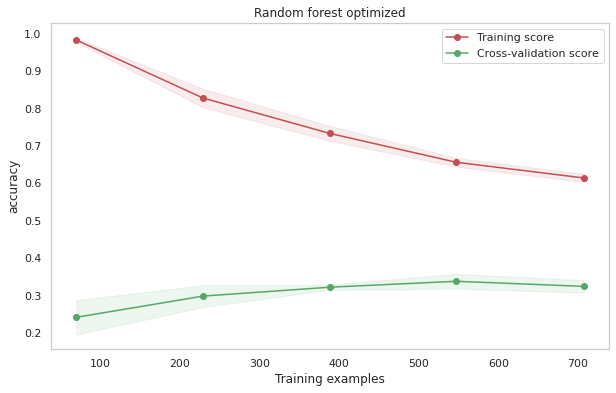

In [202]:
plot_learning_curve(rf_random.best_estimator_,'Random forest optimized', Xfi_train, yfi_train, cv=5)

look at that we fixed some of the overfitting by constraining our models hyperparams to yeild a lower variance model

amazing! hyper param tuning worked but we are still converging to a low accuracy.


### Logistic Regression

In [203]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 

clf = LogisticRegression(multi_class='ovr')
grid_values = {'penalty': ['l1', 'l2','elasticnet'],'C':[0.001,.003,0.006, 0.009, 0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 0.6, 0.9, 1.3, 1.6, 1.9]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy',cv=10)
grid_clf_acc.fit(X_train_best,y_train_best)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test_best)
predictions = [round(value) for value in y_pred_acc]
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test_best,predictions)))

Accuracy Score : 0.3473684210526316


In [204]:
# basic as used on sentiment analysis
base_model = LogisticRegression(multi_class='ovr')
base_model.fit(X_train_best, y_train_best)
print ('Basic\nTraining Performance')
test_accuracy=base_model.score(X_train_best, y_train_best)
print('= {:0.2f}%.'.format(test_accuracy))
base_accuracy = mod_acc(base_model, X_test_best, y_test_best)

best_random = grid_clf_acc.best_estimator_
print ('Best\nTraining Performance')
test_accuracy=best_random.score(X_train_best, y_train_best)
print('= {:0.2f}%.'.format(test_accuracy))
random_accuracy = mod_acc(best_random, X_test_best, y_test_best)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Basic
Training Performance
= 0.73%.
Testing Performance
= 32.37%.
___________________________________________________________________
Best
Training Performance
= 0.36%.
Testing Performance
= 34.74%.
___________________________________________________________________
Improvement of 7.32%.


In [205]:
grid_clf_acc.best_params_

{'C': 0.06, 'penalty': 'l2'}

7.3% improvemnet is good, but still not good enough

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

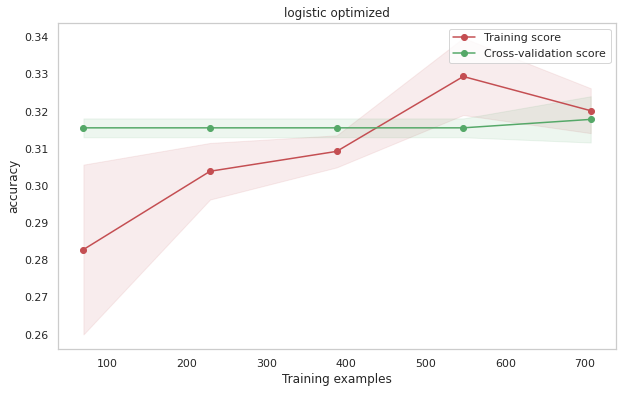

In [212]:
plot_learning_curve(grid_clf_acc.best_estimator_,'logistic optimized', Xfi_train, yfi_train, cv=5)

Still converging to a very poor accuracy but not overfitting.

When taking less that 430 training examples the training/validation sets are both so small that the results are not making any sense, insfficent training is occuring for the smaller sample sizes and the training performance appears to be of high variance as expected due to bias from batch to batch.

Essentially data is not sufiently diverse for effective training.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

# 5. Results (25 marks): 

Answer the research question stated above based on the outputs of your first model.  Describe the results of the analysis and discuss your interpretation of the results. Explain  how each party is viewed in the public eye based on the sentiment value. For the second  model, based on the model that worked best, provide a few reasons why your model may  fail to predict the correct negative reasons. Back up your reasoning with examples from the  test sets. For both models, suggest one way you can improve the accuracy of your models. 




---

In this report, the first step involved building a predictive model for sentiment analysis based on an extensive generic tweets dataset. Based on the basic traditional machine learing models tested, a logistic regression model was found to have the highest accuracy for generic tweets sentiment anaylsis at 86%. This optimized model was subsequently tested on the elections tweets dataset to predict sentiment and achieved an accuracy of 50%. Further visualization of the model's accuracy based on political party showed that the democratic parties' affiliated tweets had an accuracy slightly higher than 50% accuracy and the republican parties' affiliated tweets had an accuracy slightly lower than 50%. 

All in all sentiment predictions accuracy of the generically tuned sentiment analysis model on the US election data was poor and an improved model is needed to effectivly conduct targeted campaigns. 

An improved model could be built by using word embedding feature creation techniques that help makes sense of sequence of words and give the computer the ability to "understand" context. These features could subsequently be tested on a deep learning model given that sufficient data is available. In fact, research has shown that certain deep learning structures are very effective in the field of NLP (I test a deep learning model to compare with the model built in the next section).

The second step of this analysis involved building a classification model to predict the reason for negative sentiment tweets in the elections data. The highest accuracy random forrest classification model had an accuracy at 36% but overfit the data extremely. The logistic regression model had a similar accuracy with less overfit but still at unreasonable levels.


The model did poorly in my opinion for the following reasons:

-  unequal distribution of the labeled reasons with Covid significantly outnumbering the others

- the sample size of the negative sentement labeled tweets with reasons is small and therefore models have a hard time generlizing on new data from the little they have learned from the small training set. 

- the way in which things were predicted negative or positive sentiment may not be perfect. if it was done based on just having the word or even topic of Covid does not mean its negative. for instance, "We have found a covid vaccine" should be negative but could have been miss labeled as positive. So If the labels we were using are not perfect then the data is issentially wrong. how do u truley guage sentiment anyways! 

the model could be improved in the following ways

- Use techniques such as word2vec or Glovo word embeddings to allow the model to better put sequence of words into context and improve prediction. 

- If a bigger dataset was available, deep learning models could also be a possibility.


# ASIDE: Building and MLP-3 Neural Network Model to compare with model 1 (sentiment based on generic tweets) 

Building deep Learning algorithm based on generic tweets data and comparing its performance to the best performing sentiment classification model from above.

In this first step, I will build a simple MLP neural network by inputing the generic tweets as a TF_IDF feature vector used to generete the best performing sentiment classification model.

In [ ]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from numpy import array
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

All model configuration was found with very little trial and error and should not be considered tuned for this problem as I was just testing this method.

We will use a single hidden layer with 50 neurons and a rectified linear activation function. The output layer is a single neuron with a sigmoid activation function for predicting 0 for negative and 1 for positive sentiment tweets.

The network will be trained using the efficient Adam implementation of gradient descent and the binary cross entropy loss function, suited to binary classification problems. We will keep track of accuracy when training and evaluating the model.

In [ ]:
n_words = X1i_train.shape[1]
# define network
model = Sequential()
model.add(Dense(50, input_shape=(n_words,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model summary
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 10,101
Trainable params: 10,101
Non-trainable params: 0
_________________________________________________________________
None


Another parameter you have to your selection is the batch size. The batch size is responsible for how many samples we want to use in one epoch, which means how many samples are used in one forward/backward pass. This increases the speed of the computation as it need fewer epochs to run, but it also needs more memory, and the model may degrade with larger batch sizes. Since we have a small training set, we can leave this to a low batch size:

In [ ]:
# fit model
history = model.fit(X1i_train, y1i_train, epochs=10, verbose=False, validation_data=(X1i_test, y1i_test), batch_size=30)

Now we can use the .evaluate() method to measure the accuracy of the model. You can do this both for the training data and testing data. We expect that the training data has a higher accuracy then for the testing data. The longer you would train a neural network, the more likely it is that it starts overfitting.

In [ ]:
# evaluate the model
loss1, accuracy1 = model.evaluate(X1i_train, y1i_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy1))
loss2, accuracy2 = model.evaluate(X1i_test, y1i_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy2))

Training Accuracy: 0.8663
Testing Accuracy:  0.8649


This looks great.

similar to our previous logistic regression model

We will visualize the loss and accuracy for the training and testing data based on the History callback. This callback, which is automatically applied to each Keras model, records the loss and additional metrics that can be added in the .fit() method.

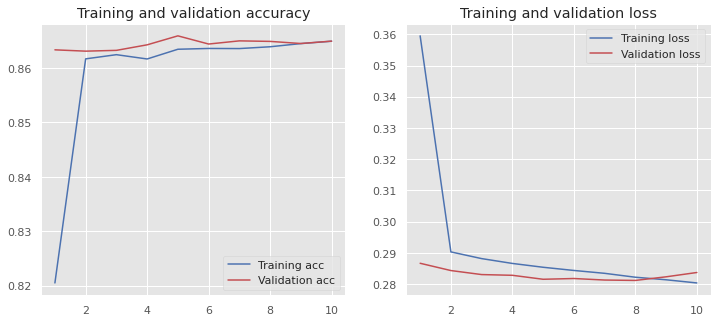

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

Learning curves look good